# Results


In [1]:
using Revise
using DrWatson
@quickactivate
include(srcdir("main.jl"))
import Beforerr: easy_save

In [4]:
enc = 8 # event id (encounter id)    
easy_save(fname; enc=enc) = Beforerr.easy_save(fname; dir="$fig_dir/enc$enc", formats=[:svg, :pdf])

easy_save (generic function with 2 methods)

In [3]:
df_enc_7 = load_all(7);
df_enc_8 = load_all(8);
df_enc_9 = load_all(9);
df = reduce(vcat, [df_enc_7, df_enc_8, df_enc_9], cols=:intersect);

┌ Info: Loading /Users/zijin/projects/psp_conjunction/data/enc7/updated_events_PSP_tr=20210114-20210121_method=fit_tau=0:00:16_ts=0:00:00.218454.arrow
└ @ Main /Users/zijin/projects/psp_conjunction/src/io.jl:12
┌ Info: Loaded 877 data points
└ @ Main /Users/zijin/projects/psp_conjunction/src/io.jl:14
┌ Warning: automatically converting Arrow.Timestamp with precision = NANOSECOND to `DateTime` which only supports millisecond precision; conversion may be lossy; to avoid converting, pass `Arrow.Table(source; convert=false)
└ @ Arrow /Users/zijin/.julia/packages/Arrow/rIDSw/src/eltypes.jl:273
┌ Info: Electron temperature columns not found
└ @ Main /Users/zijin/projects/psp_conjunction/src/io.jl:79
┌ Info: Loading /Users/zijin/projects/psp_conjunction/data/enc7/updated_events_THEMIS_tr=20210115-20210123_method=fit_tau=0:00:30_ts=0:00:01.arrow
└ @ Main /Users/zijin/projects/psp_conjunction/src/io.jl:12
┌ Info: Loaded 379 data points
└ @ Main /Users/zijin/projects/psp_conjunction/src/io.jl:14

In [13]:
function plot_dist_comp(
    df1, df2;
    figure_kwargs=(size=(800, 600),),
    kwargs...
)

    df = reduce(vcat, [df1, df2], cols=:intersect)
    data_layer = data(df) * mapping(color=ds_mapping, marker=ds_mapping)

    maps = [l_log_map j_log_map
        l_norm_log_map j_norm_log_map]

    plot_dist(data_layer; maps, axis=(), visual=mapping(), figure_kwargs=figure_kwargs, kwargs...)
end

function plot_dist_comp(df1, df2, tr1, tr2)
    df1 = subset_timerange(df1, tr1...)
    df2 = subset_timerange(df2, tr2...)
    @info "Number of data points in df1: $(nrow(df1))"
    @info "Number of data points in df2: $(nrow(df2))"
    plot_dist_comp(df1, df2)
end

plot_dist_comp (generic function with 2 methods)

## Distribution comparison

### Enc 7

In [11]:
enc = 7 # event id (encounter id)    
easy_save(fname) = Beforerr.easy_save(fname; dir="$fig_dir/enc$enc", formats=[:svg])
mkpath("$fig_dir/$enc");

In [15]:
plot_dist_comp(psp_df, wind_df,
    ["2021-01-15", "2021-01-17"], 
    ["2021-01-17", "2021-01-19"]
)

┌ Info: Number of data points in df1: 108
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:19
┌ Info: Number of data points in df2: 249
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:20


┌ Info: Number of data points in df1: 108
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:19
┌ Info: Number of data points in df2: 272
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W5sZmlsZQ==.jl:20


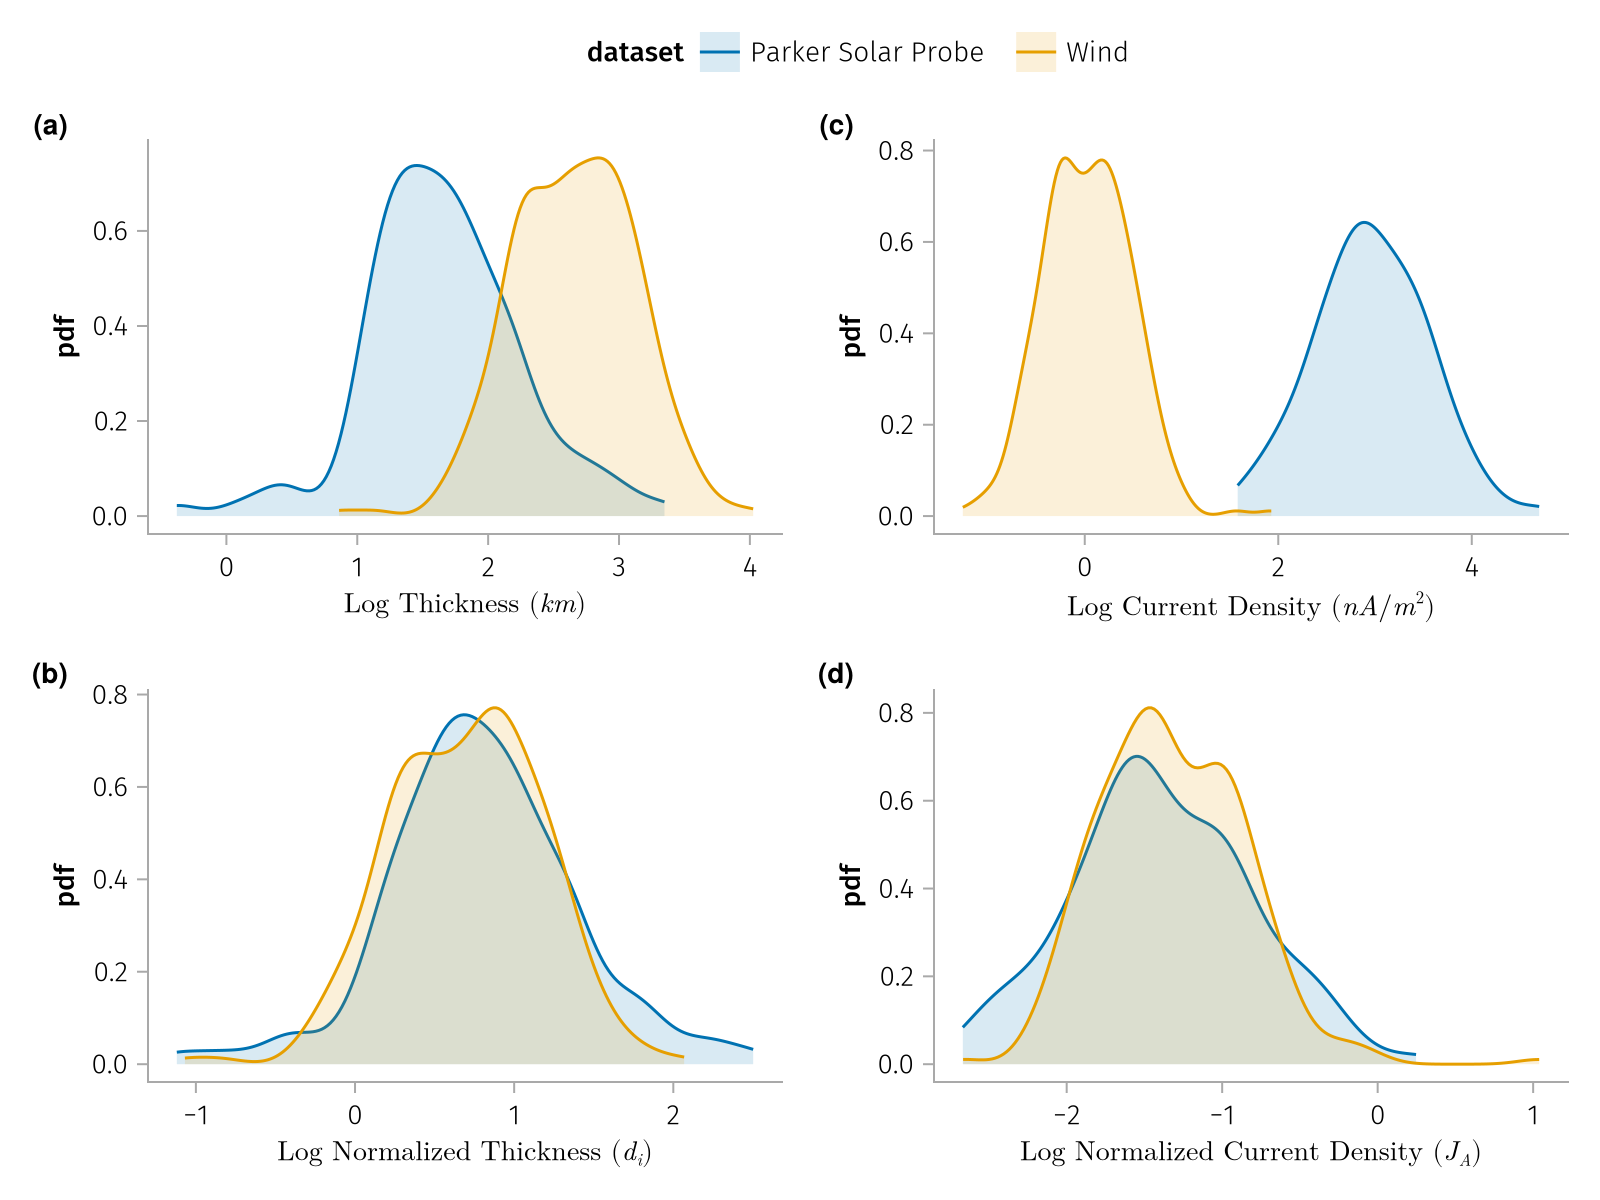

In [16]:
plot_dist_comp(psp_df, wind_df,
    ["2021-01-15", "2021-01-17"], 
    ["2021-01-21", "2021-01-23"]
)

### Enc 8

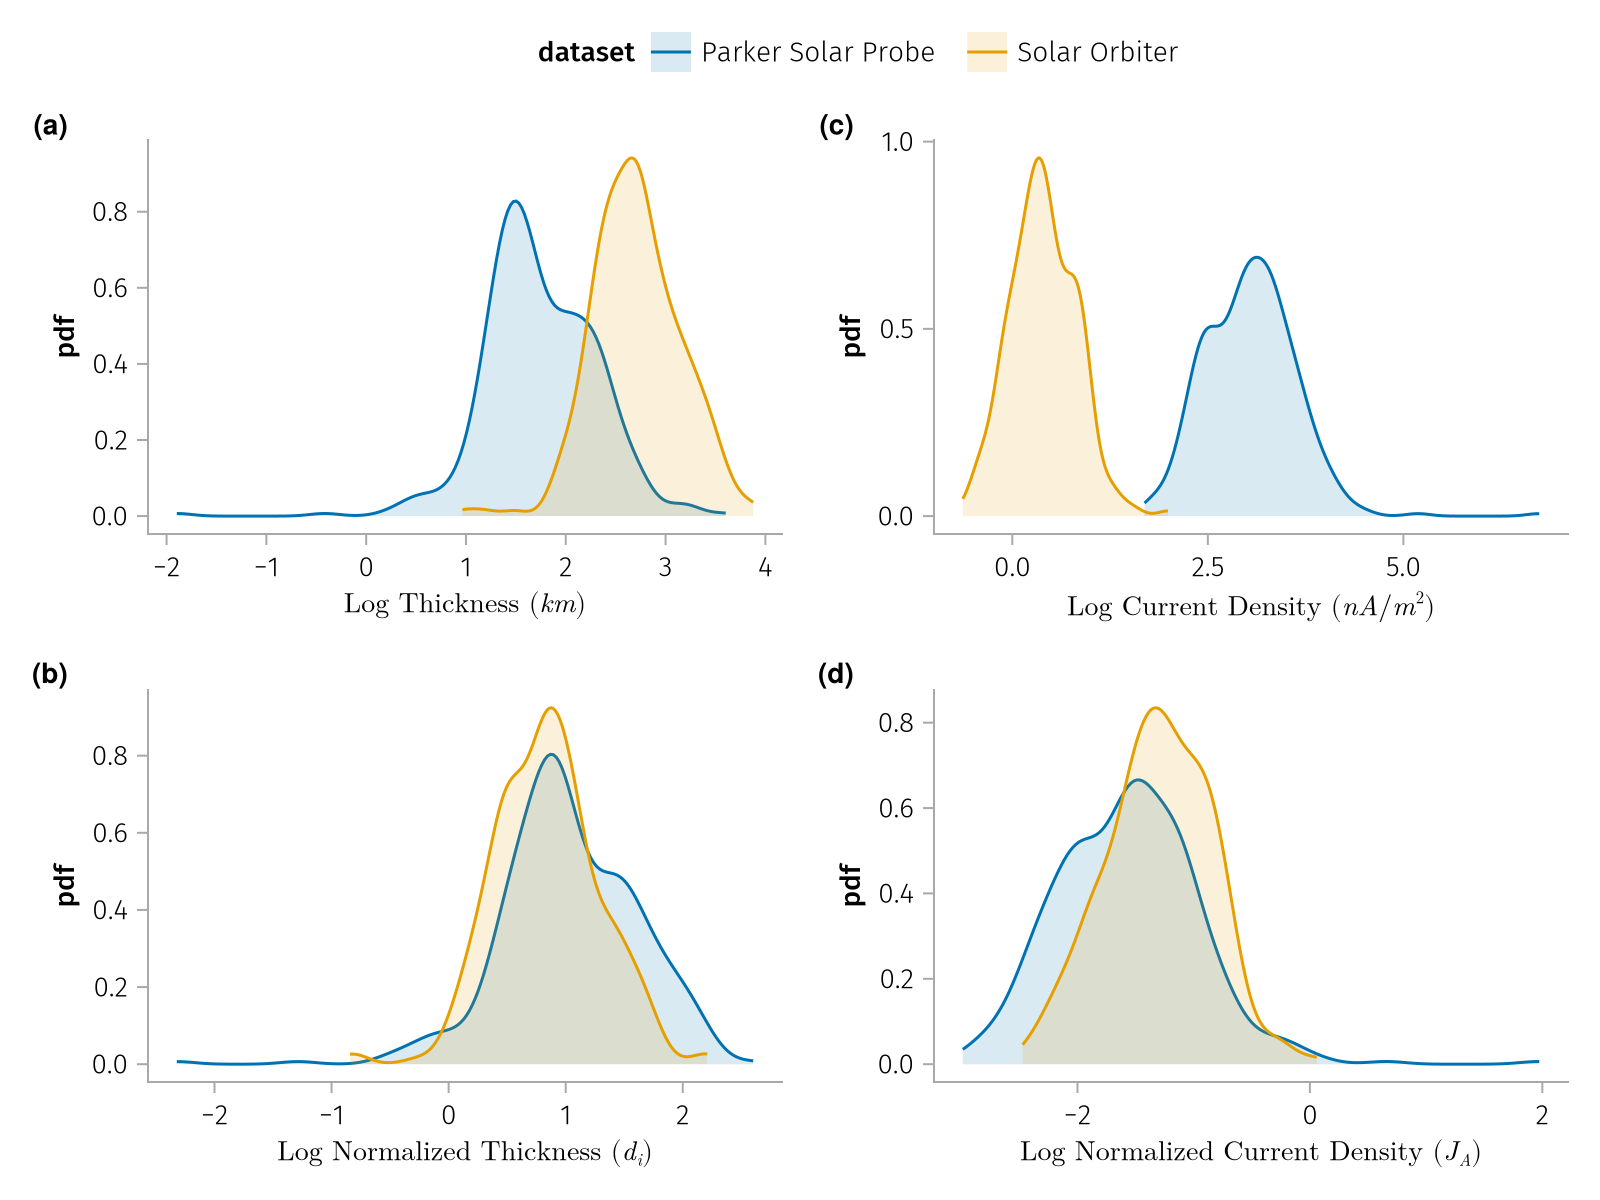

In [5]:
plot_dist_comp(psp_df, solo_df)

In [9]:
DateTime("2021-04-29T00:45") + Hour(145)
DateTime("2021-04-29T00:45") + Hour(-1)

2021-04-28T23:45:00

┌ Info: Number of data points in df1: 29
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl:18
┌ Info: Number of data points in df2: 8
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl:19
┌ Info: Number of data points in df1: 131
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl:18
┌ Info: Number of data points in df2: 80
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl:19
┌ Info: Number of data points in df1: 131
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl:18
┌ Info: Number of data points in df2: 133
└ @ Main /Users/zijin/projects/psp_conjunction/notebooks/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_X50sZmlsZQ==.jl

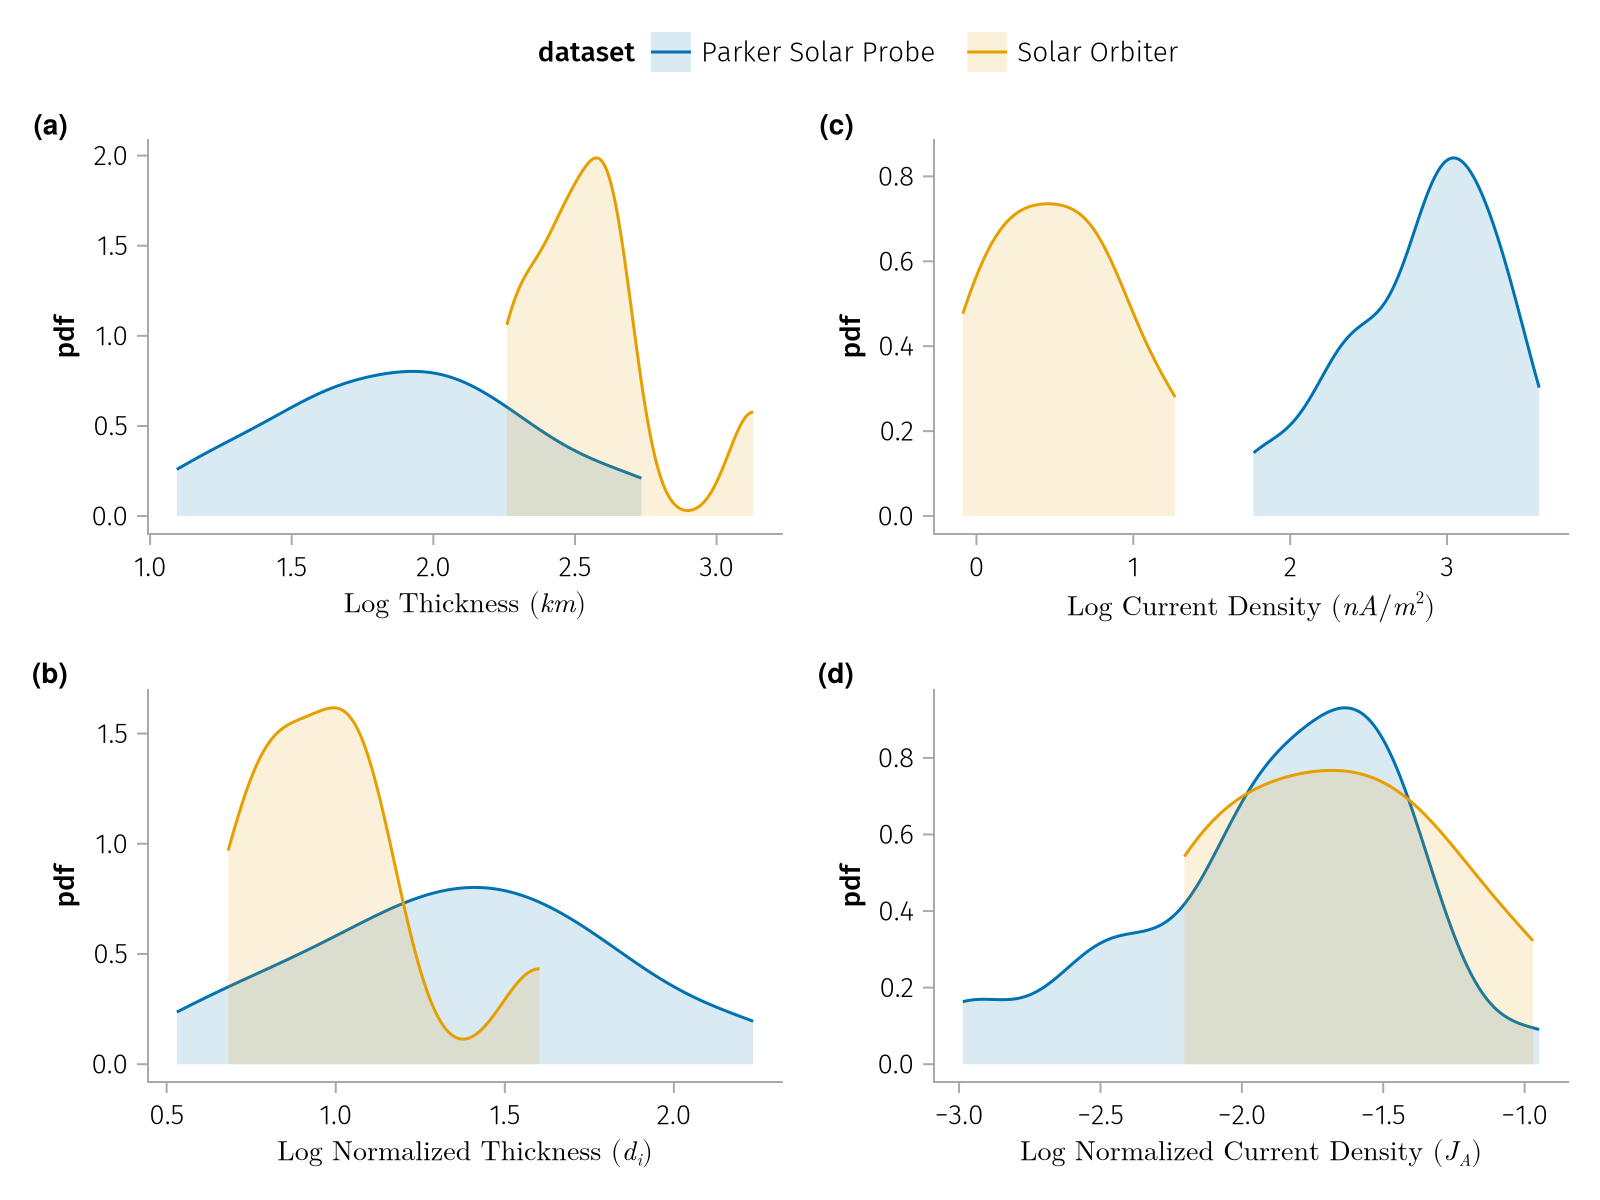

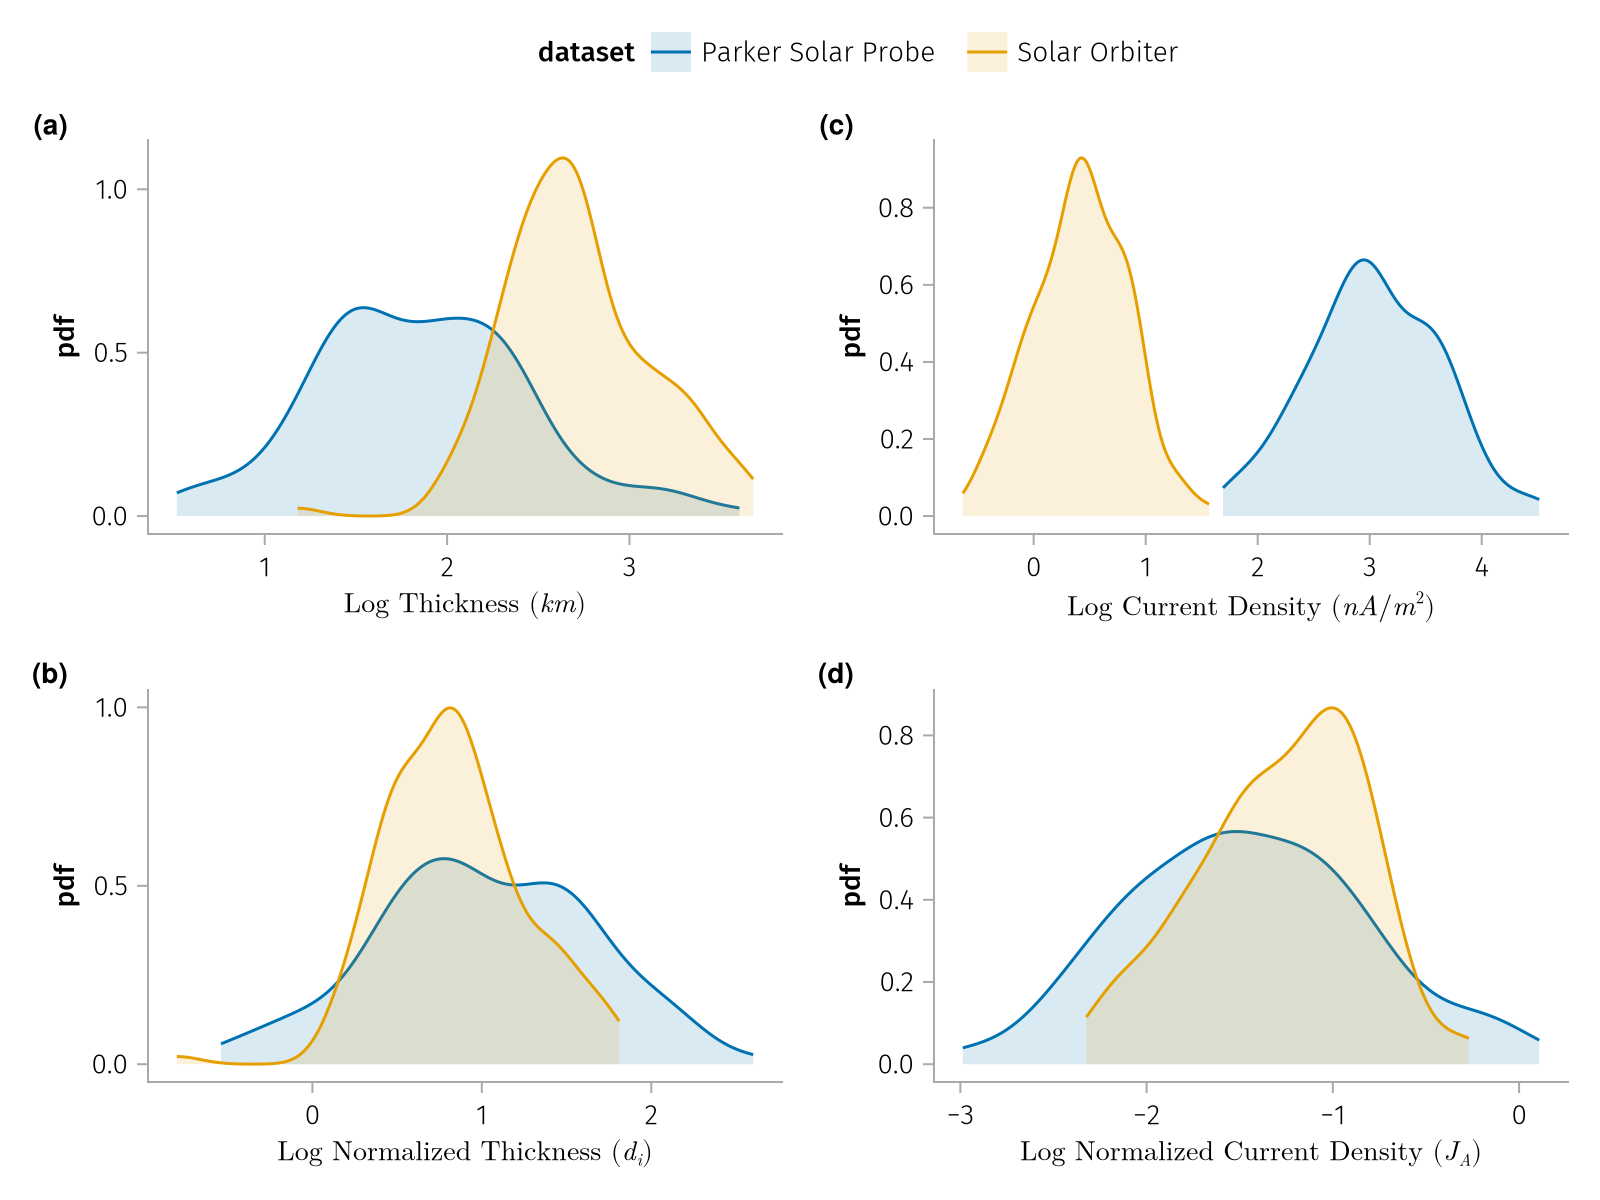

In [89]:
#| layout-ncol: 3
#| column: screen
f1 = plot_dist_comp(psp_df, solo_df,
    ["2021-04-29T00:15", "2021-04-29T02:15"],
    ["2021-05-04T17:45:00", "2021-05-04T19:45:00"]
)
f2 = plot_dist_comp(psp_df, solo_df,
    ["2021-04-28T00:15", "2021-04-29T02:15"],
    ["2021-05-03T17:45:00", "2021-05-04T19:45:00"]
)

f3 = plot_dist_comp(psp_df, solo_df,
    ["2021-04-28T00:15", "2021-04-29T02:15"],
    ["2021-05-04T17:45:00", "2021-05-05T19:45:00"]
)
display(f1)
display(f2)
display(f3);

In [ ]:
begin
    df = reduce(
        vcat,
        [psp_df, thm_df, wind_df, solo_df],
        cols=:intersect
    )

    earth_df = reduce(
        vcat,
        [thm_df, wind_df],
        cols=:intersect
    )
end;

In [42]:
begin
    # base data layer
    data_layer = data(df) * mapping(color=ds_mapping, marker=ds_mapping)

    # data layer with different alpha
    data_layer_a = (
        (data(thm_df) + data(wind_df)) * visual(alpha=0.3) + data(psp_df) * visual(alpha=1)
    ) * mapping(
        color=ds_mapping, marker=ds_mapping
    )

    # data layer with 1au missions
    data_layer_b = (
        (data(wind_df) + data(thm_df))
    ) * mapping(
        color=:dataset, marker=:dataset
    )
end;

## Discontinuities' properties

In [18]:
# velocity v is normalized to $l Ω$, where $l$ represents the width of the RD and $Ω = q B/(mpc)$ is the cyclotron frequency.
function v_norm!(df::AbstractDataFrame)
    df.v_to_norm = df.L_k .* df."B.mean"
end
v_norm!(df);

In [33]:
layer =  data(df) * mapping(color=:dataset, col=:enc)
axis = (yscale=log10,)
figure = (size=(600, 800),);

In [16]:
Bn = :bn_over_b => abs => L"B_N/B";
v_norm = :v_to_norm => log10 => "Log v_gyro";

In [31]:
dfplot(layer, args...; axis = (;), kwargs...) = draw(layer * mapping(args...; kwargs...); axis)
dfplot(df::AbstractDataFrame, args...; axis = (;), kwargs...) = draw(data(df) * mapping(args...; kwargs...); axis)

dfplot (generic function with 2 methods)

In [34]:
using GLMakie
GLMakie.activate!()
axis = (type = Axis3, width = 300, height = 300)
dfplot(layer, v_norm, ω_in, Bn; axis)

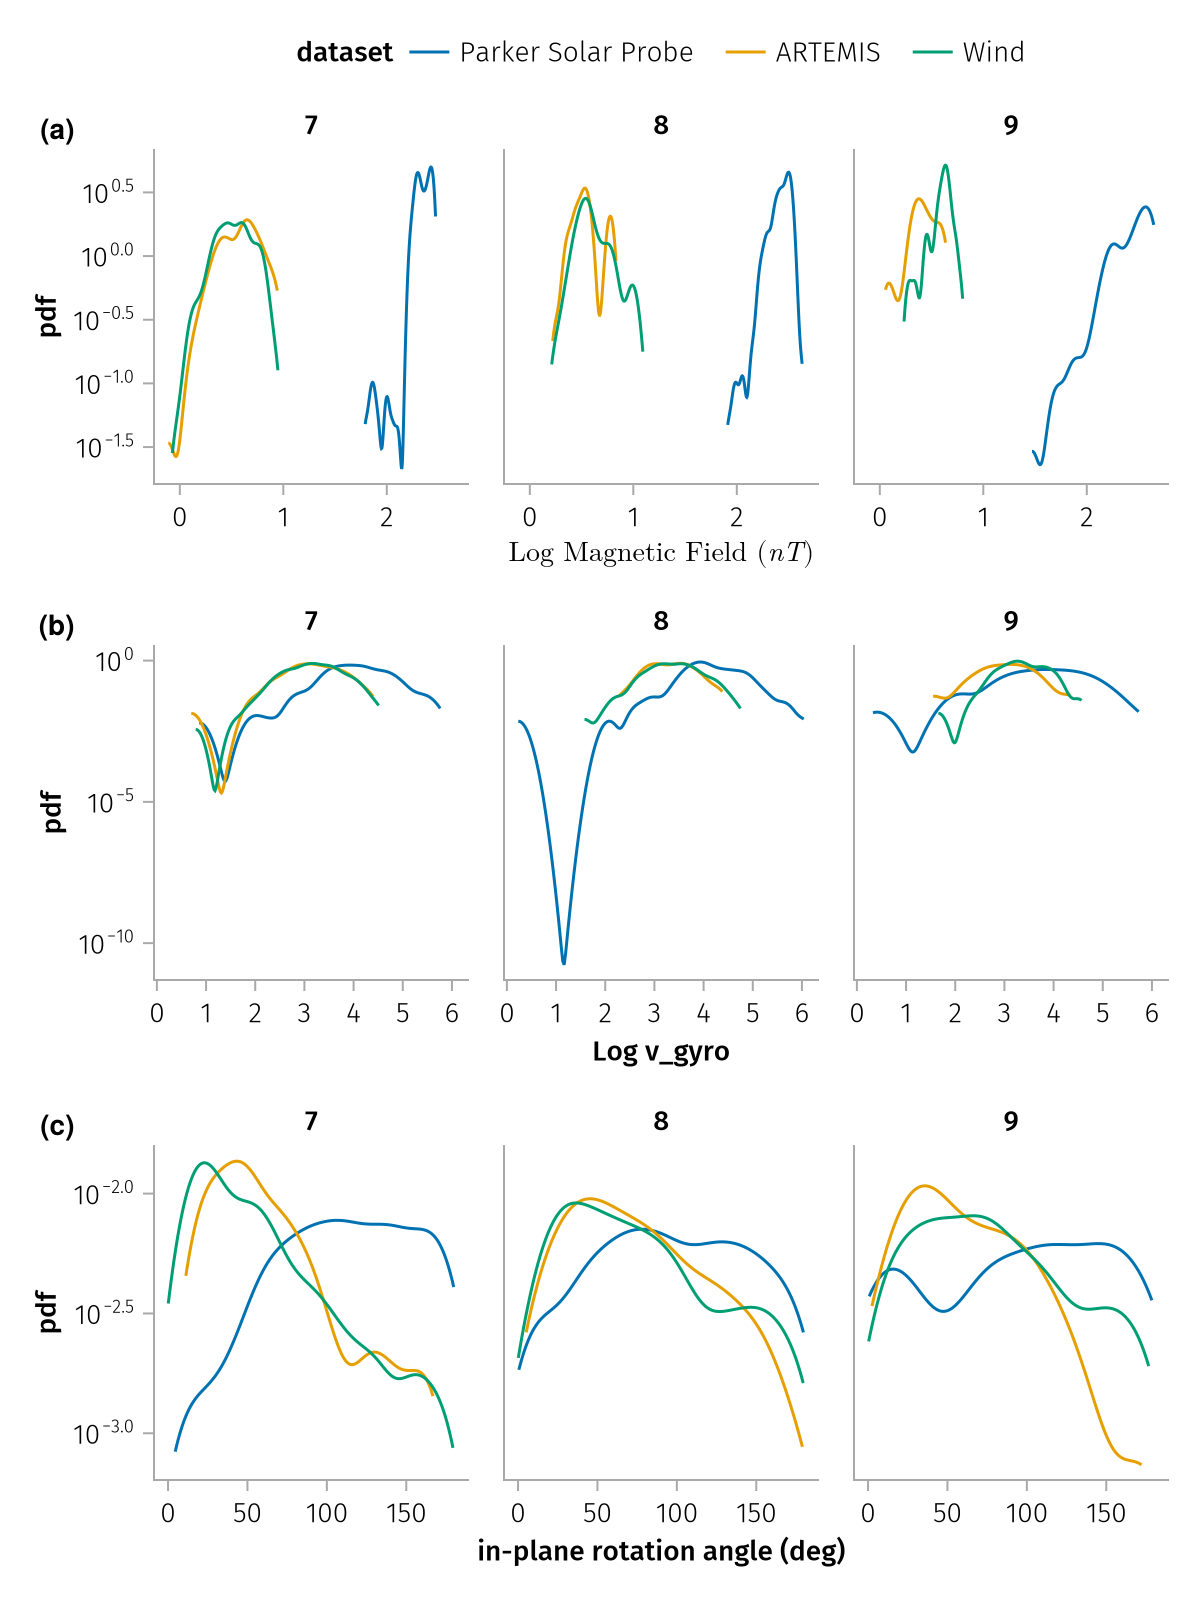

In [39]:
maps = [B_log_map, v_norm,  ω_in]
plot_dist(layer, maps; figure=figure)

In [57]:
function plot_dB_over_B(layer; axis=(yscale=identity,), datalimits=((0, 0.3),))
    plt = layer * mapping(dB_over_B_map) * density(datalimits=datalimits) * visual(Lines)
    draw(plt; axis=axis)
end

# log scale is not good for this parameter
# plot_dB_over_B(layer; axis = (yscale=log10,)) |> display 

plot_dB_over_B(layer)

┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc8/properties_distribution.svg
└ @ Beforerr /Users/zijin/.julia/dev/Beforerr/src/utils/makie.jl:45


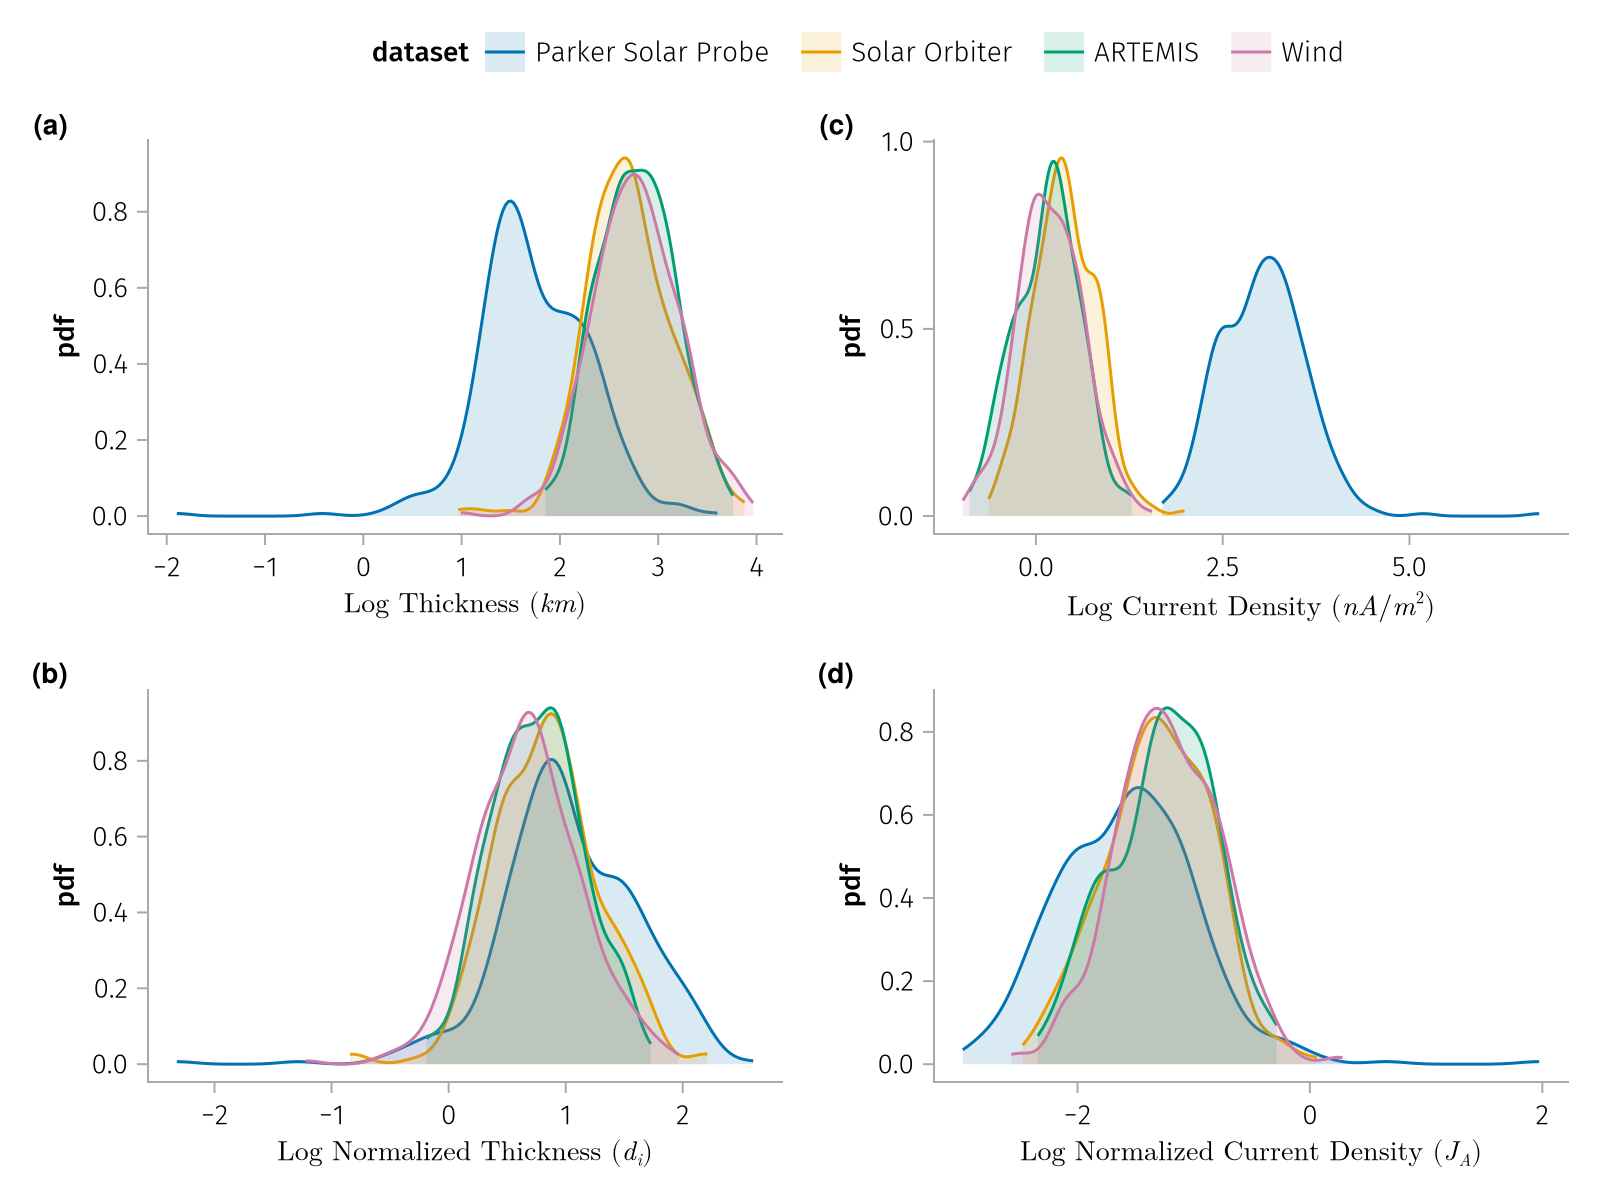

In [43]:
# plot the density distribution of the thickness and current density
begin
    fname = "properties_distribution"

    maps = [l_log_map j_log_map
        l_norm_log_map j_norm_log_map]
    figure_kwargs = (size=(800, 600),)
    
    plot_dist(data_layer; maps, axis=(), visual=mapping(), figure_kwargs=figure_kwargs)
    easy_save(fname) 
end

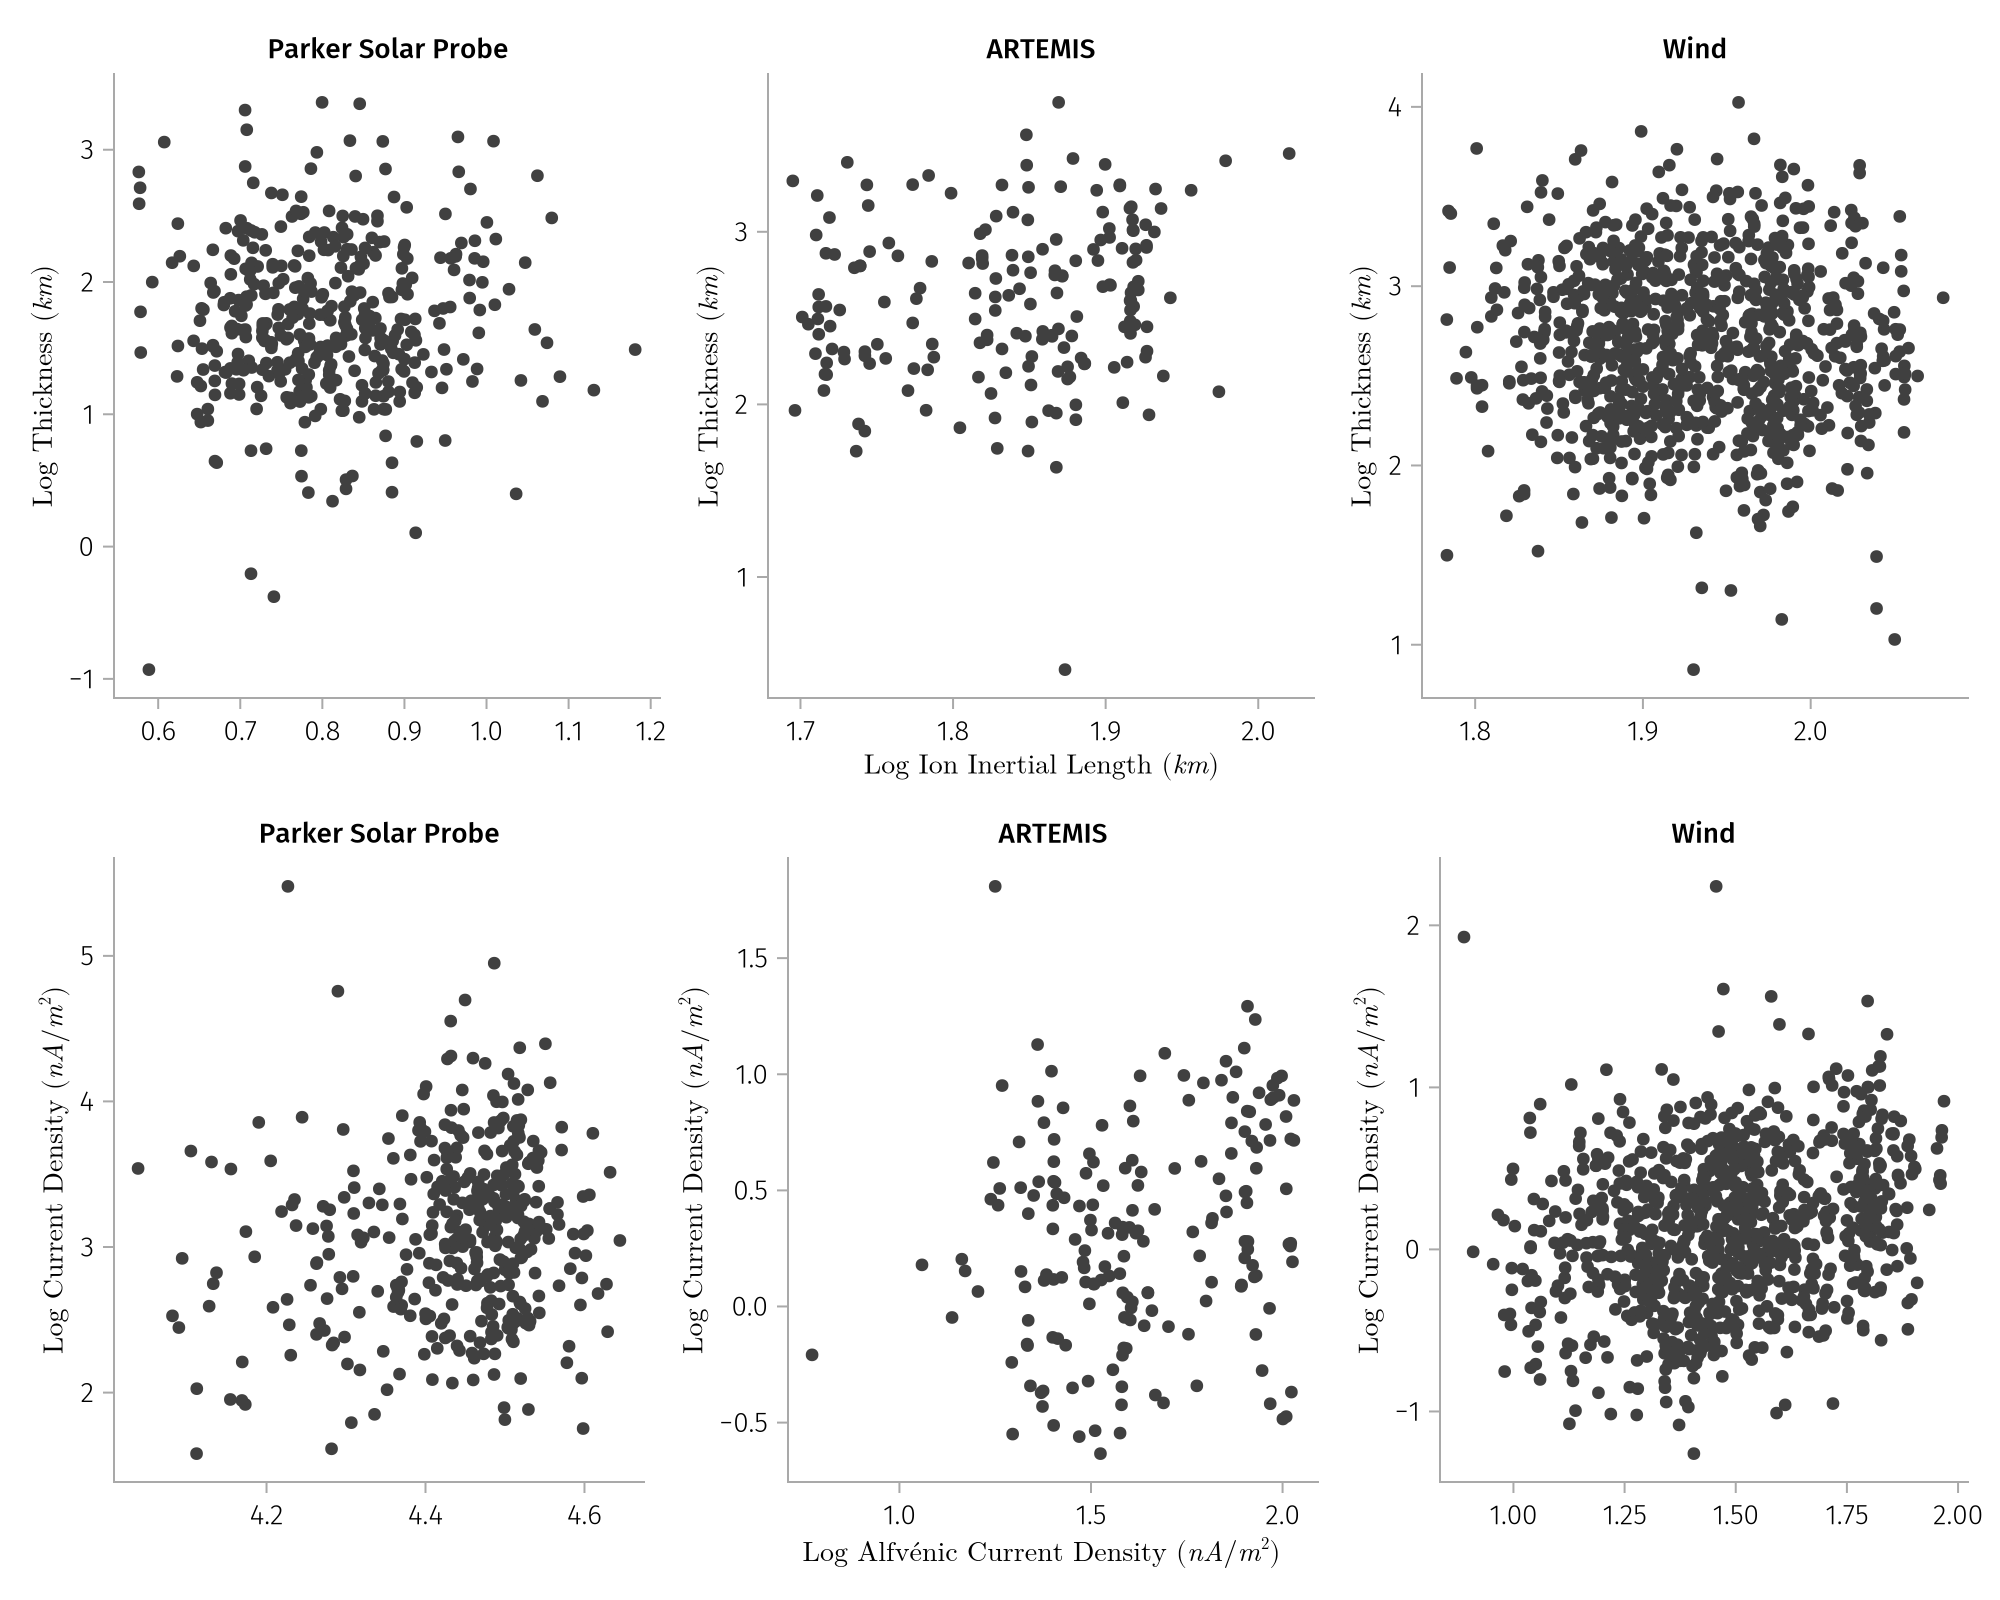

In [10]:
function plot_l_j_local_comp(df)
    fig = Figure(size=(1000, 800))

    data_layer = data(df) * mapping(col=:dataset)

    facet = (; linkxaxes=:none, linkyaxes=:none)
    # Thickness Panels
    begin
        plt = data_layer * mapping(di_log_map, l_log_map)
        axis = (;)
        draw!(fig[1, 1:3], plt, axis=axis, facet=facet)
    end

    # Current Density Panels
    begin
        plt = data_layer * mapping(jA_log_map, j_log_map)
        axis = (;)
        draw!(fig[2, 1:3], plt, axis=axis, facet=facet)
    end

    fig
end

df |> plot_l_j_local_comp

`ggscatterhist` can not handle log scale well

┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc7/dn-dB.pdf
└ @ Beforerr /Users/zijin/.julia/dev/Beforerr/src/utils/makie.jl:48


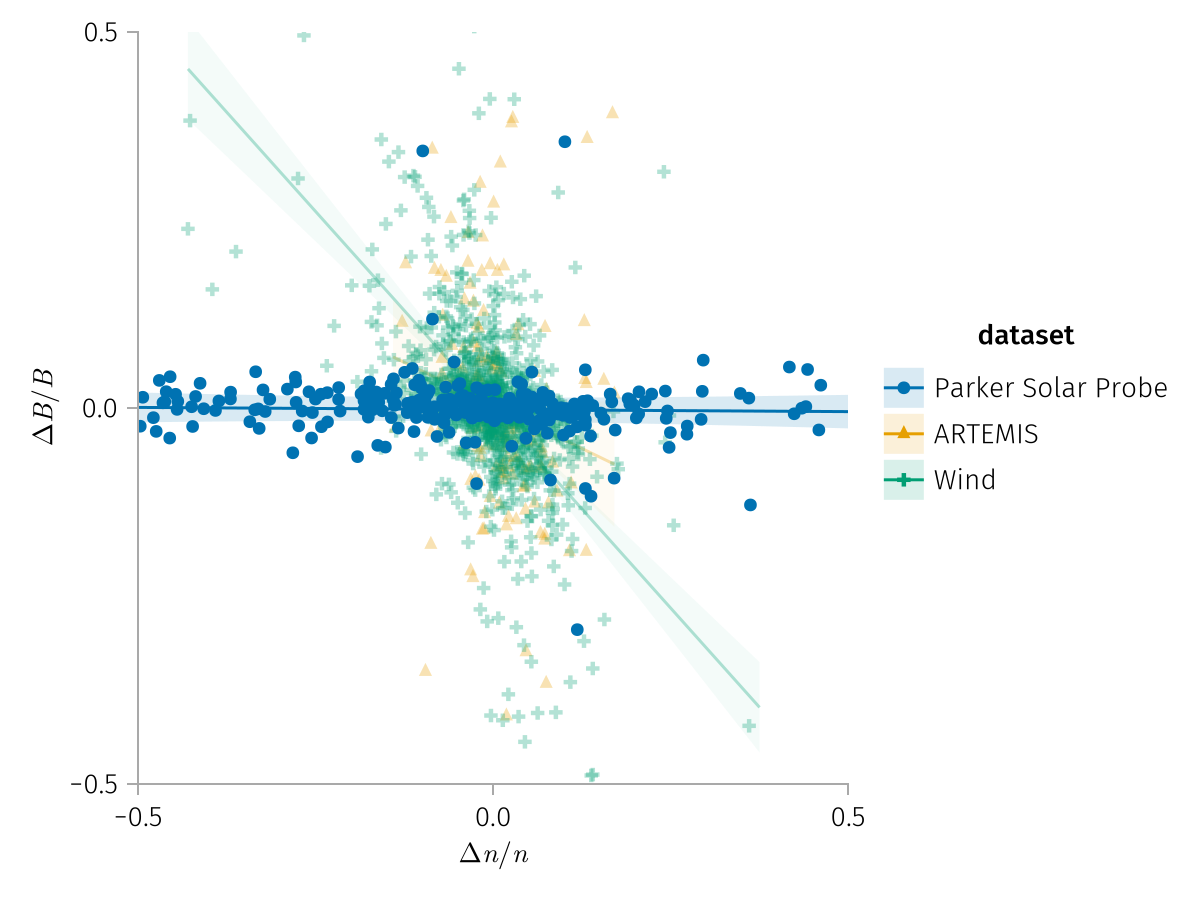

In [50]:
#| label: fig-dn-dB
#| column: screen
axis = (limits=((-0.5, 0.5), (-0.5, 0.5)),)

begin
    fname = "dn-dB"
    plt = data_layer_a * mapping(dn_over_n, dB_over_B) * (AlgebraOfGraphics.linear() + visual(Scatter))
    fg = draw(plt, axis=axis)
    easy_save(fname)
end

In [126]:
#| label: fig-dn-dT
#| column: screen
begin
    fname = "dn-dT"
    plt = data_layer_a * mapping(dT_over_T, dn_over_n) * (mapping())

    fig = Figure(size=(1000, 500))
    grid1 = plt |> draw!(fig[1, 1])
    grid2 = plt |> draw!(fig[1, 2]; axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))

    pretty_legend!(fig, grid1)
    easy_save(fname)

    fig
end

ArgumentError: ArgumentError: column name "T.change" not found in the data frame; existing most similar names are: "B.change" and "n.change"

In [115]:
#| label: fig-dT-dB
#| column: screen
begin
    fname = "dT-dB"
    plt = data_layer_a * mapping(dT_over_T, dB_over_B) * (AlgebraOfGraphics.linear() + mapping())

    fig = Figure(size=(1000, 500))
    grid = draw!(fig[1, 1], plt)
    draw!(fig[1, 2], plt, axis=(; limits=((-0.5, 0.5), (-0.5, 0.5))))
    
    pretty_legend!(fig, grid1)
    easy_save(fname)

    fig
end

ArgumentError: ArgumentError: column name "T.change" not found in the data frame; existing most similar names are: "B.change" and "n.change"

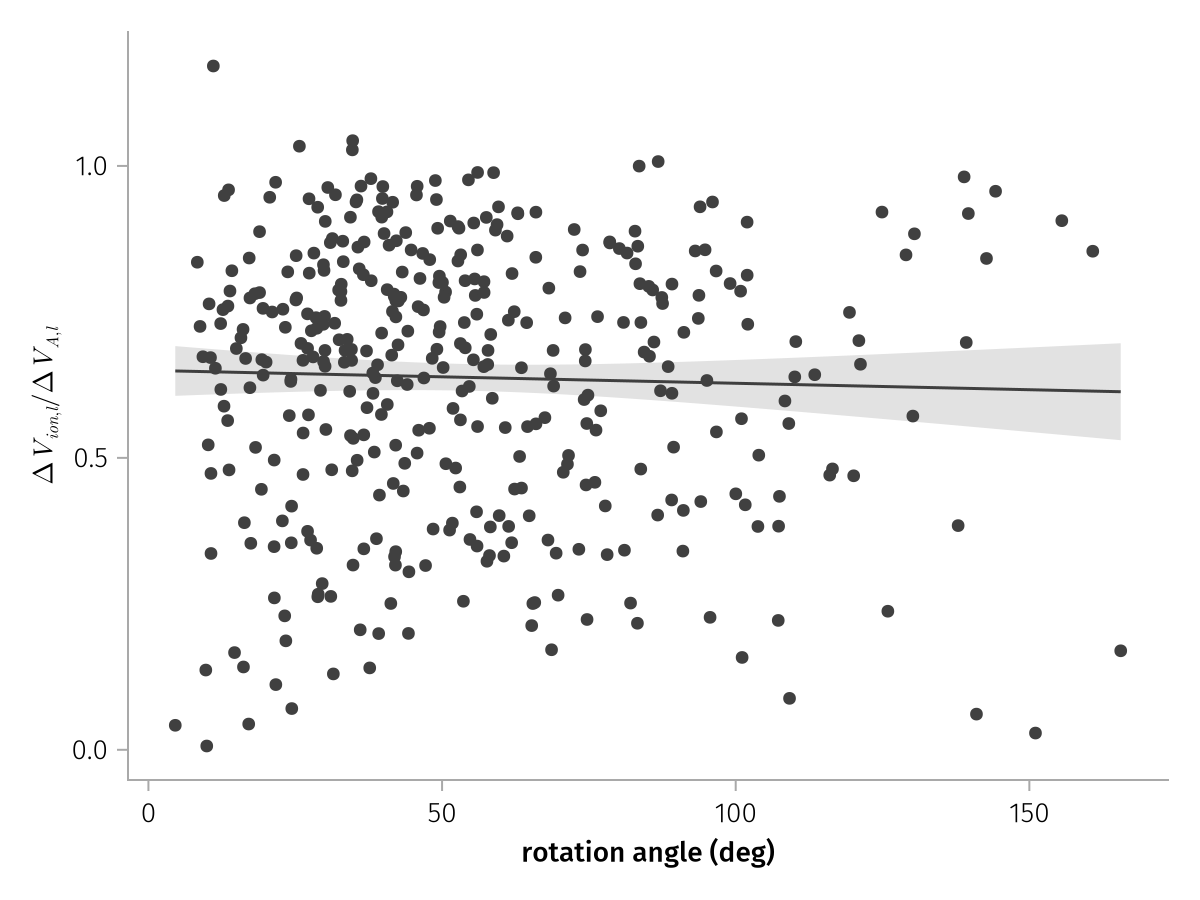

In [57]:
ω_map = :rotation_angle => "rotation angle (deg)";
v_l_ratio_map = :v_l_ratio => L"Δ V_{ion,l} / Δ V_{A,l}"
plt = data(psp_df) * mapping(ω_map, v_l_ratio_map) * (linear() + visual(Scatter))
draw(plt)

## Alfvenicity

Comparison of change in Alfven speed and plasma speed

The distinguishing feature of rotational discontinuities is the plasma velocity jump across them: the plasma ﬂow velocity $v_l$ (the solar wind velocity projected onto l) changes due to changes in $B_l$, $Δv_l=±Δv_A$ with $v_A= B_l / \sqrt{4 n m}$ (Landau & Lifshitz 1960; Hudson 1970).

┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc7/dvl.svg
└ @ Beforerr /Users/zijin/.julia/dev/Beforerr/src/utils/makie.jl:45


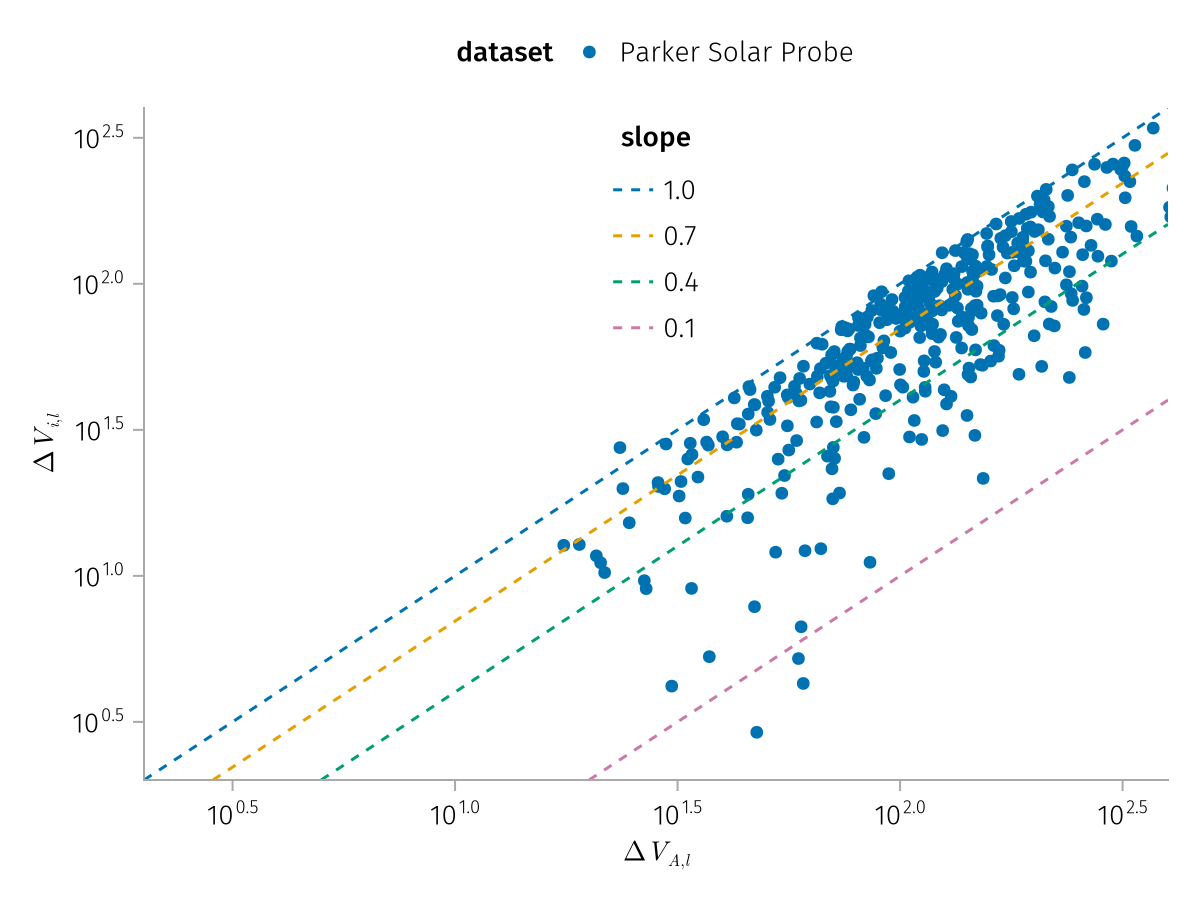

In [63]:
#| label: fig-dvl
#| column: screen
fig = plot_dvl(psp_df)

┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc7/vl_ratio.pdf
└ @ Beforerr /Users/zijin/.julia/dev/Beforerr/src/utils/makie.jl:48
┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc7/vl_ratio.png
└ @ Beforerr /Users/zijin/.julia/dev/Beforerr/src/utils/makie.jl:48


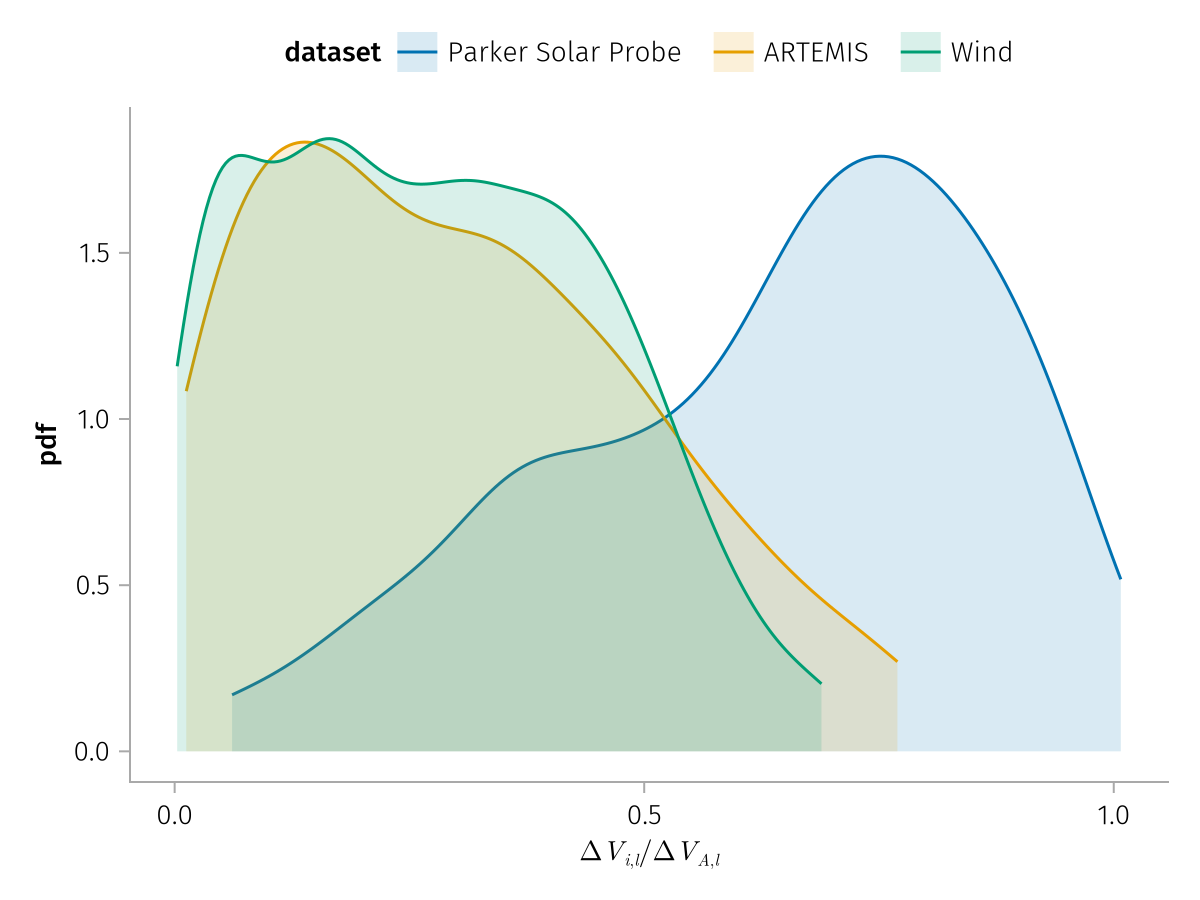

In [30]:
plot_vl_ratio(df)

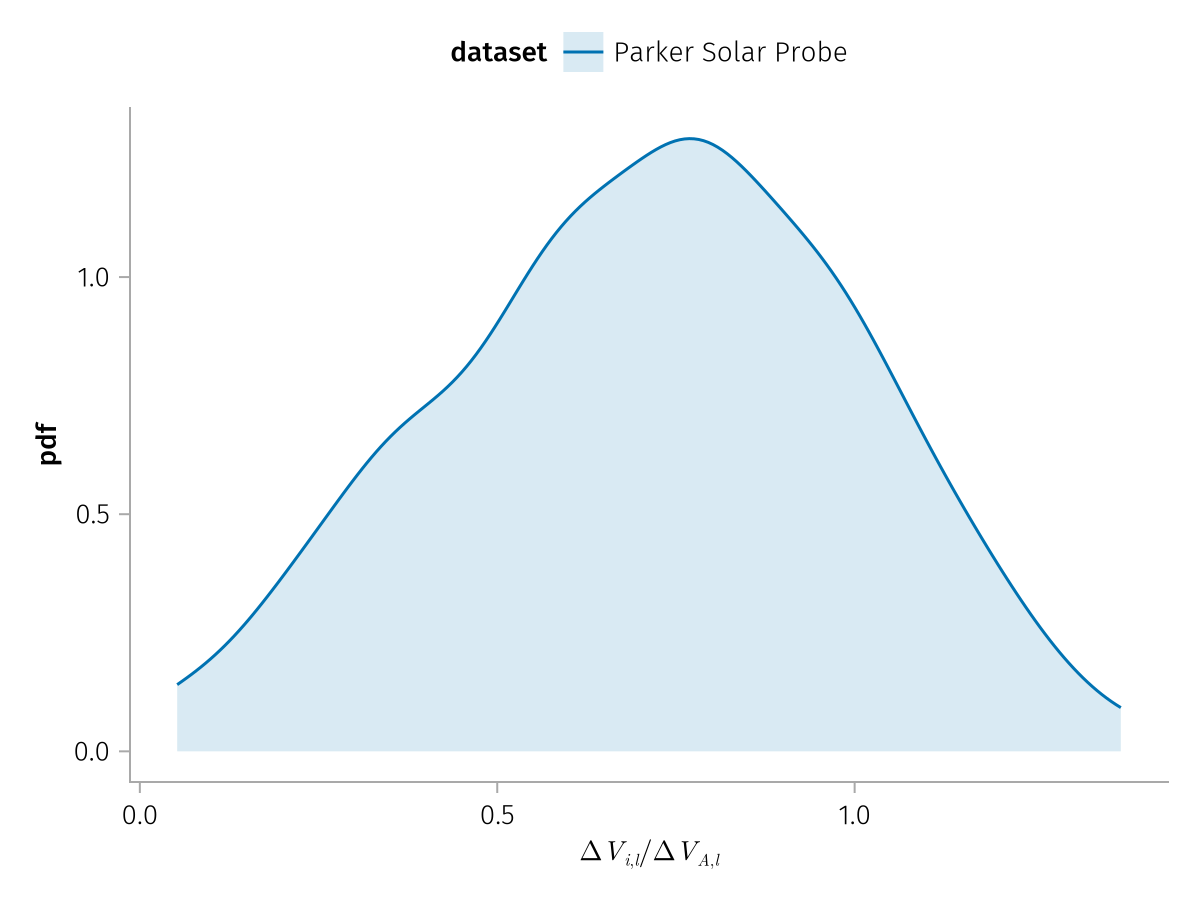

In [48]:
vl_ratio_label = L"\Delta V_{i,l} / \Delta V_{A,l}"
v_l_fit_ratio_map = "v_l_fit_ratio" => vl_ratio_label

plot_vl_ratio(psp_df; mapping_args=(v_l_fit_ratio_map,), fname=missing)

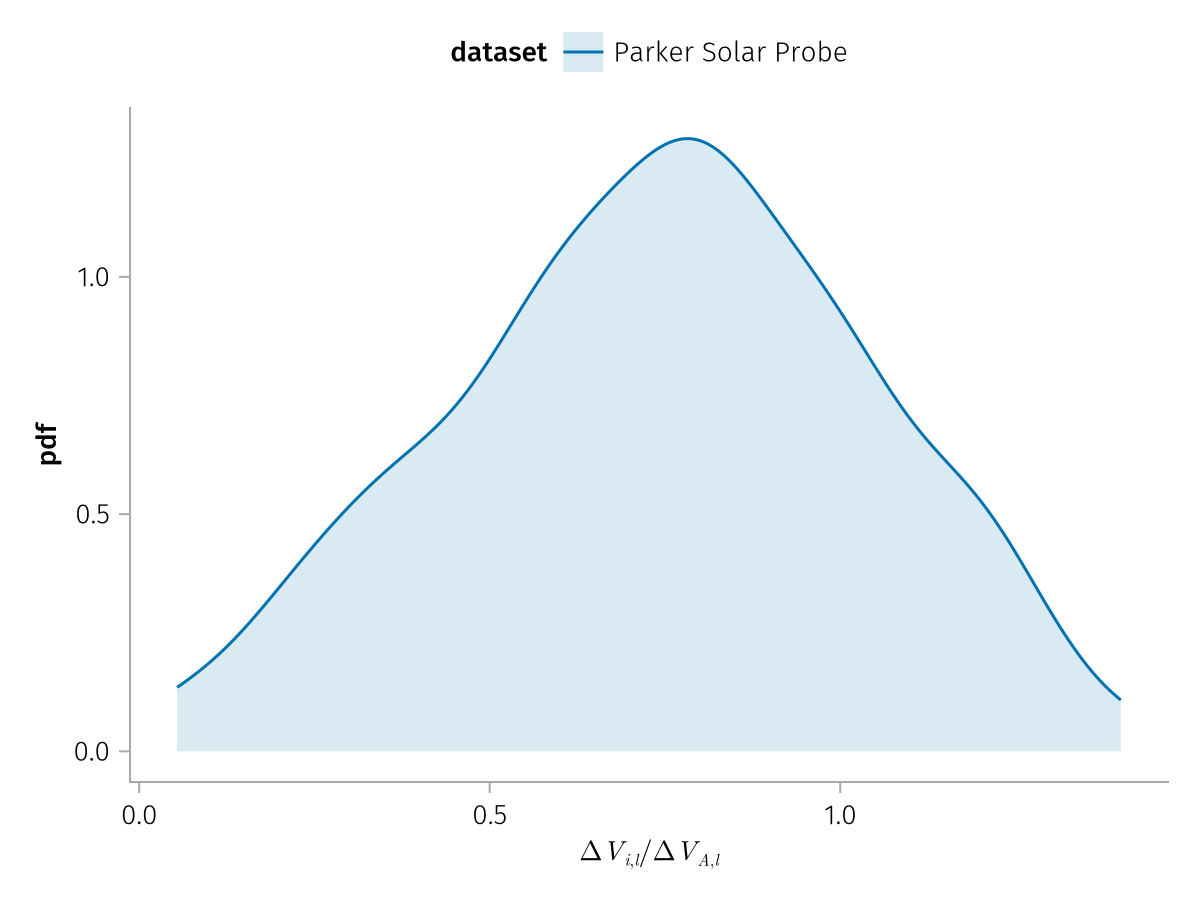

In [47]:
v_l_fit_ratio_map = "v_l_ratio.fit.Λ_ion" => vl_ratio_label

plot_vl_ratio(psp_df; mapping_args=(v_l_fit_ratio_map,), fname=missing)

## Anistropy

@shenComparingPlasmaAnisotropy2024

┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc7/anisotropy_comparison_2d.pdf
└ @ Beforerr /Users/zijin/.julia/dev/Beforerr/src/utils/makie.jl:48
┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc7/anisotropy_comparison_2d.png
└ @ Beforerr /Users/zijin/.julia/dev/Beforerr/src/utils/makie.jl:48


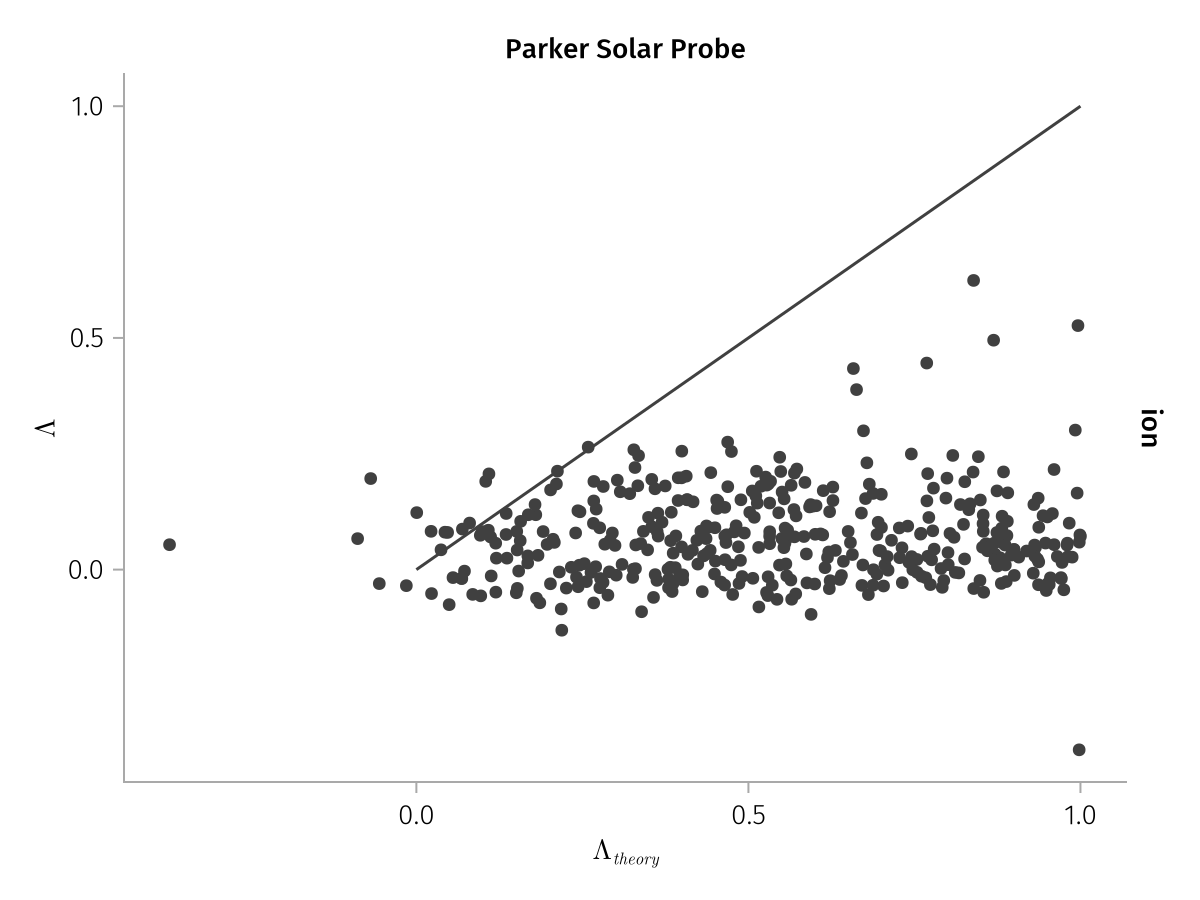

In [28]:
plot_anistropy_comparison_2d(psp_df)

In [22]:
psp_df.Λ_ion_r = abs.(psp_df.Λ_ion ./ psp_df.Λ_t .- 1)
first(sort(psp_df, :Λ_ion_r), 4)

4×91 DataFrame
 Row │ time                 tstart               tstop                t.d_end  ⋯
     │ DateTime             DateTime             DateTime             DateTime ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2021-01-17T13:23:04  2021-01-17T13:22:56  2021-01-17T13:23:12  2021-01- ⋯
   2 │ 2021-01-17T14:00:48  2021-01-17T14:00:40  2021-01-17T14:00:56  2021-01-
   3 │ 2021-01-17T14:04:16  2021-01-17T14:04:08  2021-01-17T14:04:24  2021-01-
   4 │ 2021-01-17T14:02:56  2021-01-17T14:02:48  2021-01-17T14:03:04  2021-01-
                                                              88 columns omitted

┌ Info: Saved /Users/zijin/projects/psp_conjunction/notebooks/figures/anisotropy.spi_n_spi.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


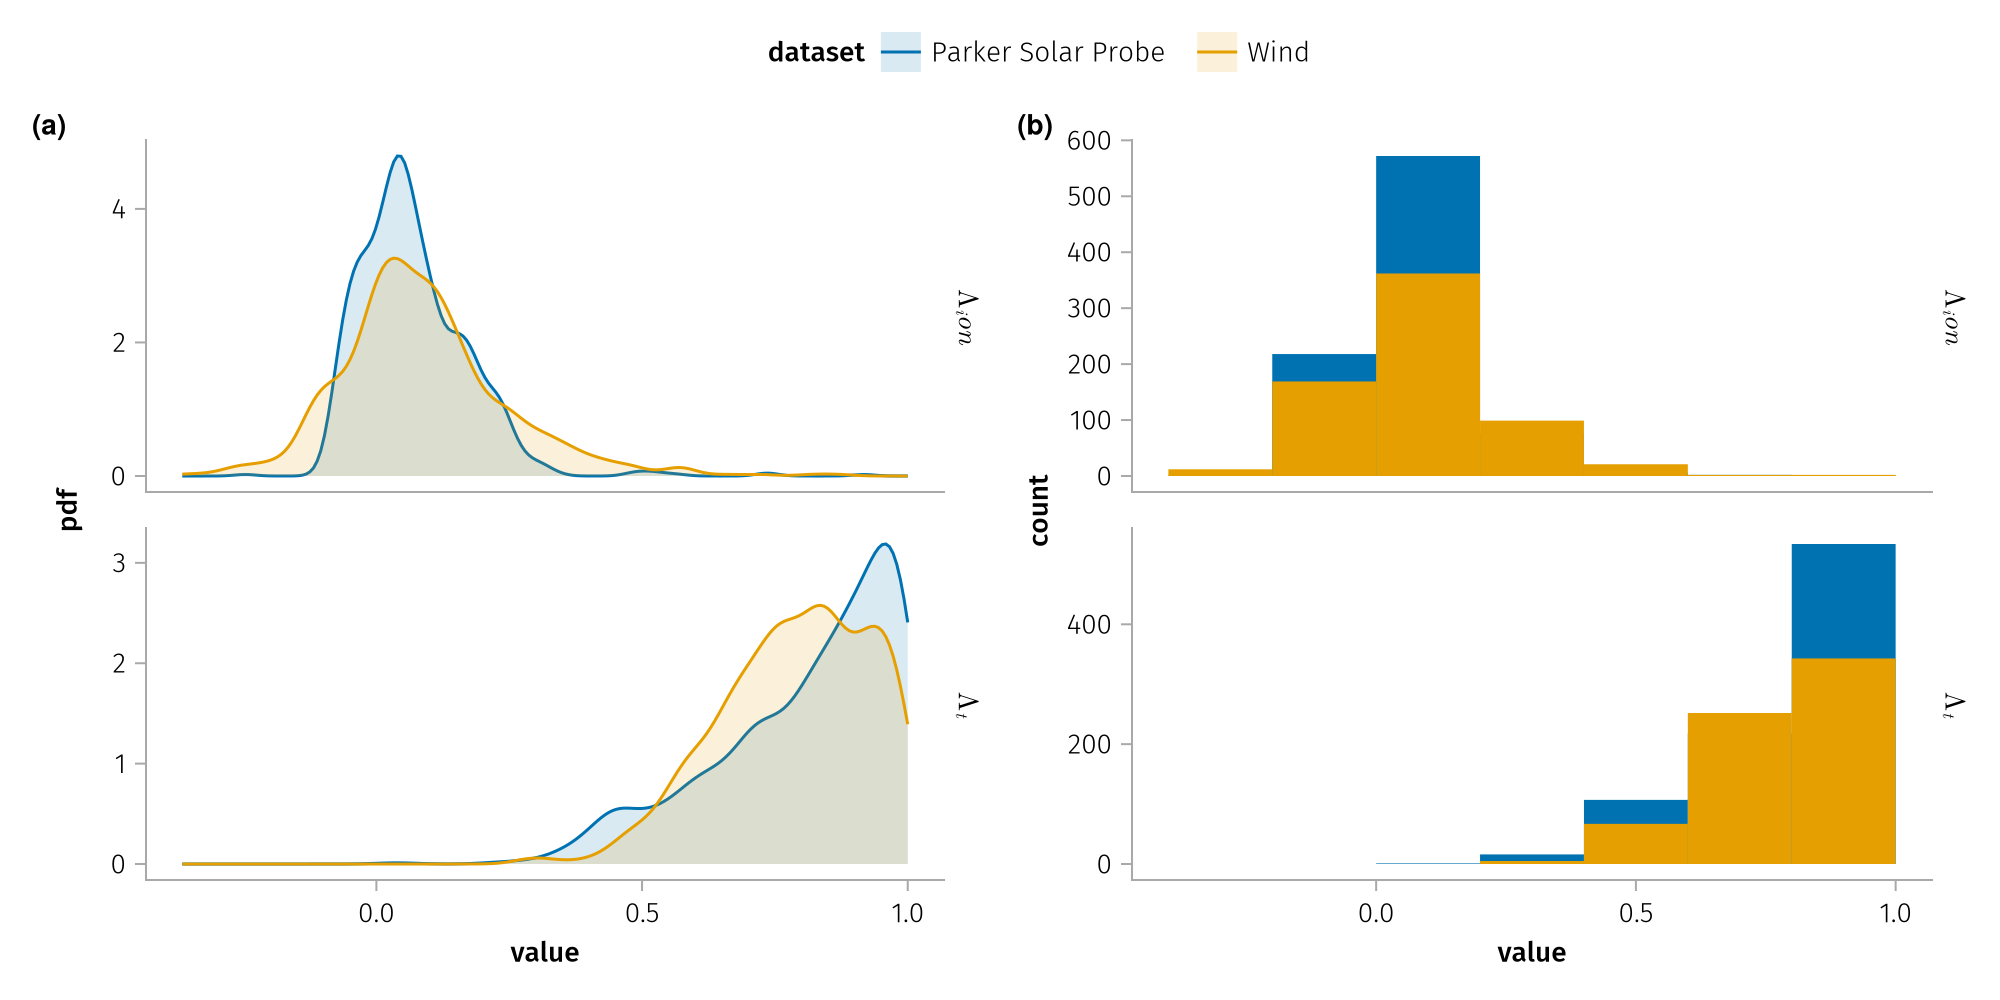

In [46]:
plot_anistropy(df)

┌ Info: Saved /Users/zijin/projects/psp_conjunction/figures/enc7/anisotropy_theory.png
└ @ beforerr /Users/zijin/.julia/dev/beforerr.jl/src/utils/makie.jl:34


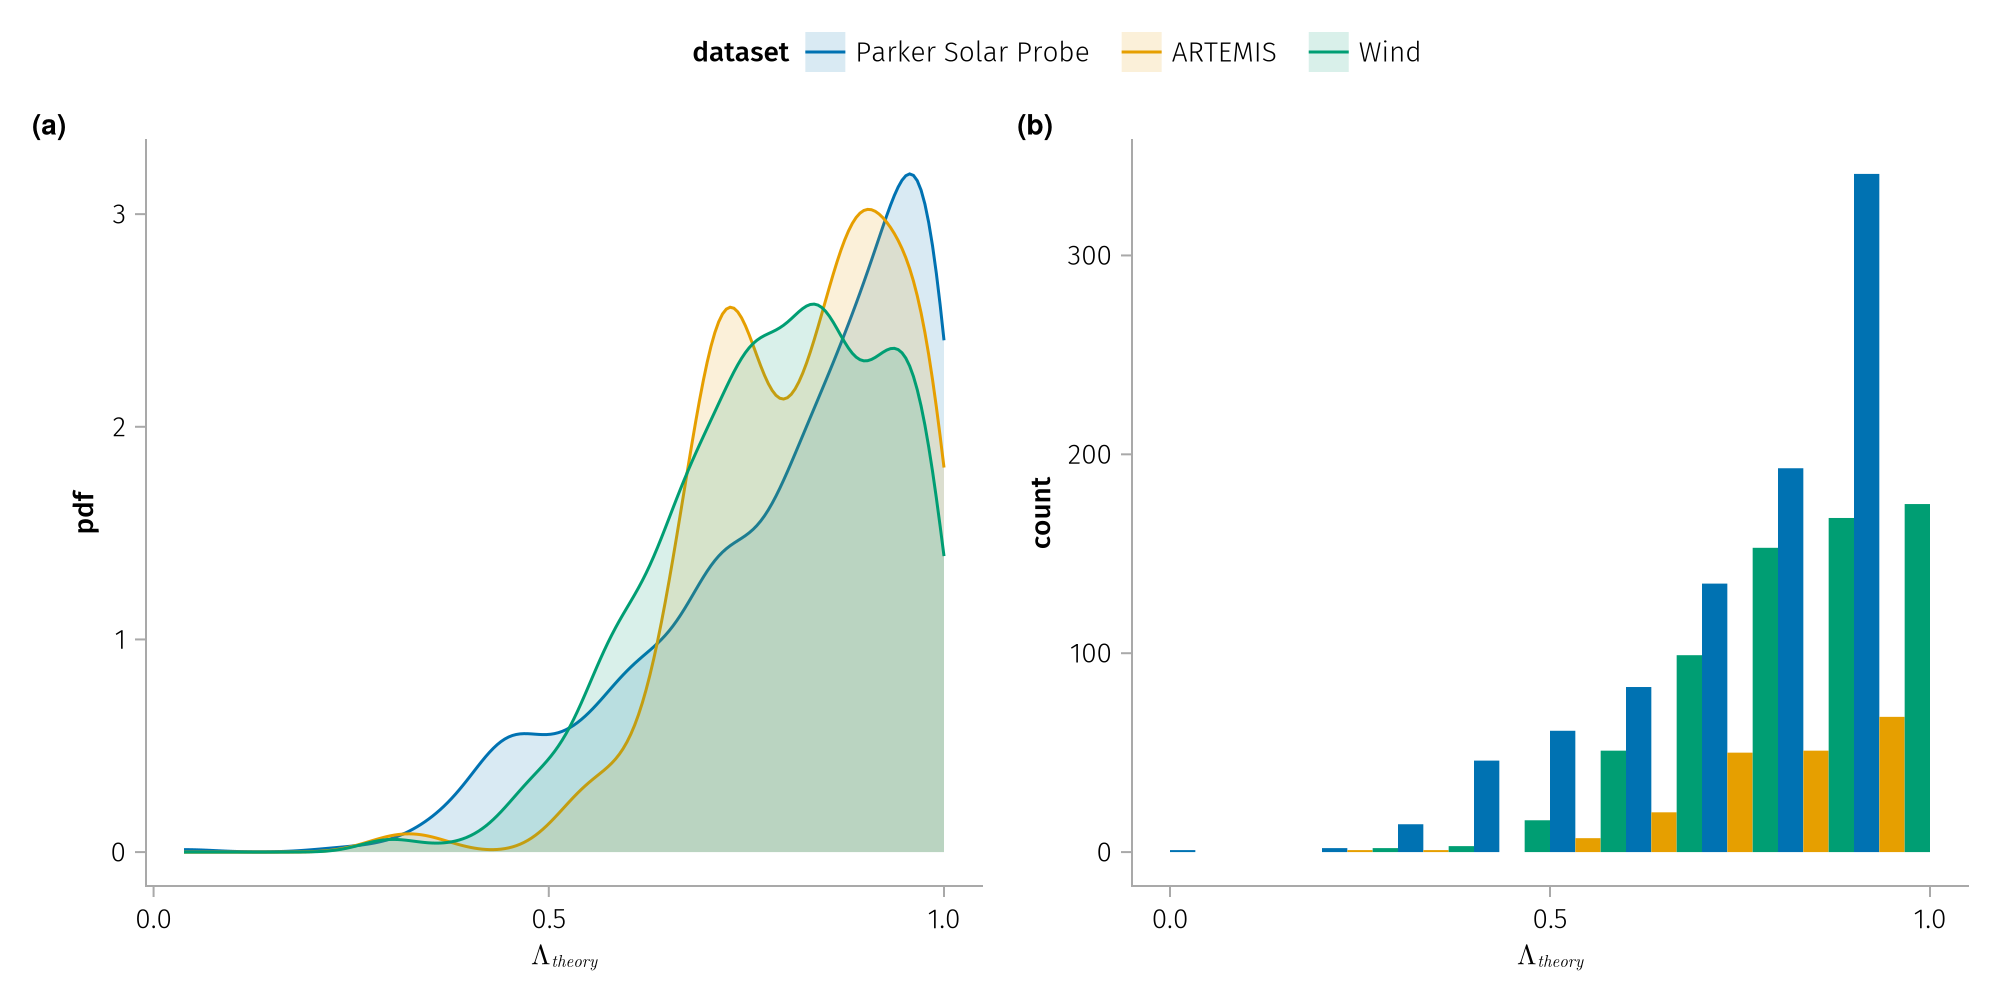

In [59]:
#| label: fig-anisotropy
#| column: screen
plot_anistropy_theory(df)

In [35]:
function plot_anistropy_comparison()
    fname = "anisotropy_comparison"

    fig = Figure(size=(1000, 800))

    plt_Λ = data(
        stack(earth_df, [:Λ, :Λ_t, :Λ_ion, :Λ_e], [:time, :dataset])
    ) * mapping(:value => L"\Lambda", color=:variable, marker=:variable, col=:dataset)

    grid1 = plt_Λ * density() |> draw!$fig[1, 1:2]
    grid2 = plt_Λ * histogram() |> draw!$fig[2, 1:2]
    # easy_save("$(fname)_$psp_p_instr")
    # legend!(fig[1, 1:2], grid, titleposition=:left, orientation=:horizontal)
    pretty_legend!(fig, grid1)

    fig
end

function plot_anistropy_comparison_i_e()
    fname = "anisotropy_comparison_i_e"

    mapping_layer = mapping(
        Λ_e_map, Λ_ion_map,
    )

    # draw a dashed line with slope 1
    df2 = (Λ_e=[0, 0.3], Λ_ion=[0, 0.3])

    plt = (data(earth_df) * mapping(row=:dataset) + data(df2) * visual(Lines)) * mapping_layer

    fig = draw(plt, facet=(; linkxaxes=:minimal, linkyaxes=:minimal))
    fig
end

plot_anistropy_comparison_i_e (generic function with 1 method)

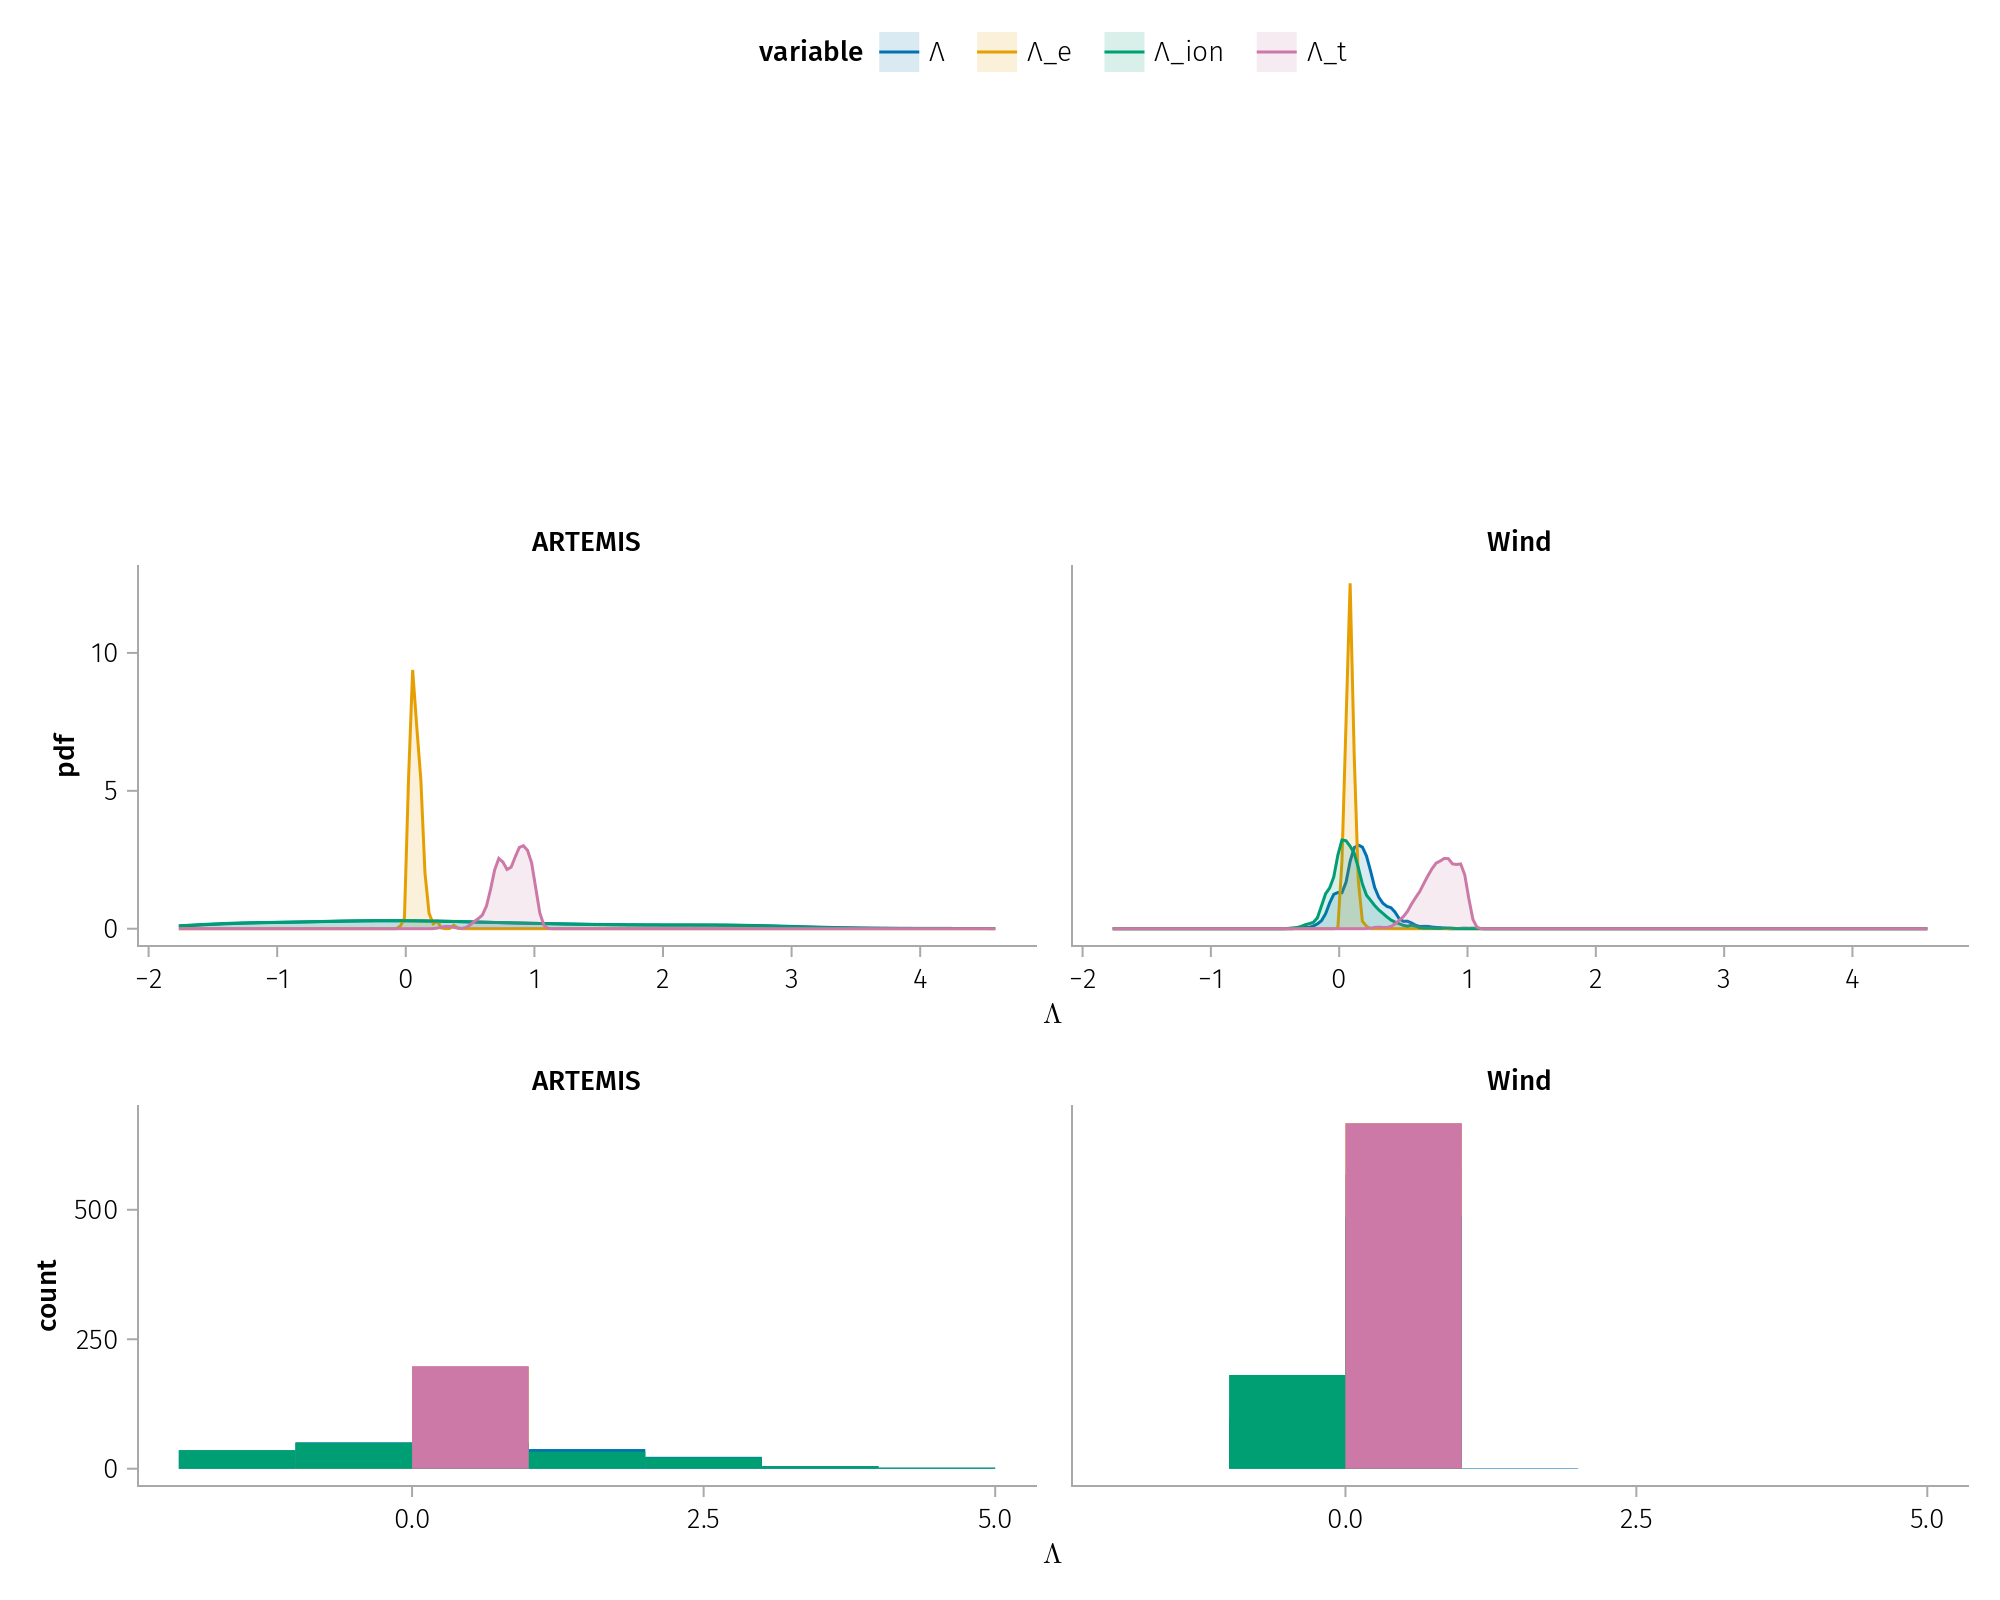

In [37]:
#| label: fig-anisotropy-comp
#| column: screen
plot_anistropy_comparison()

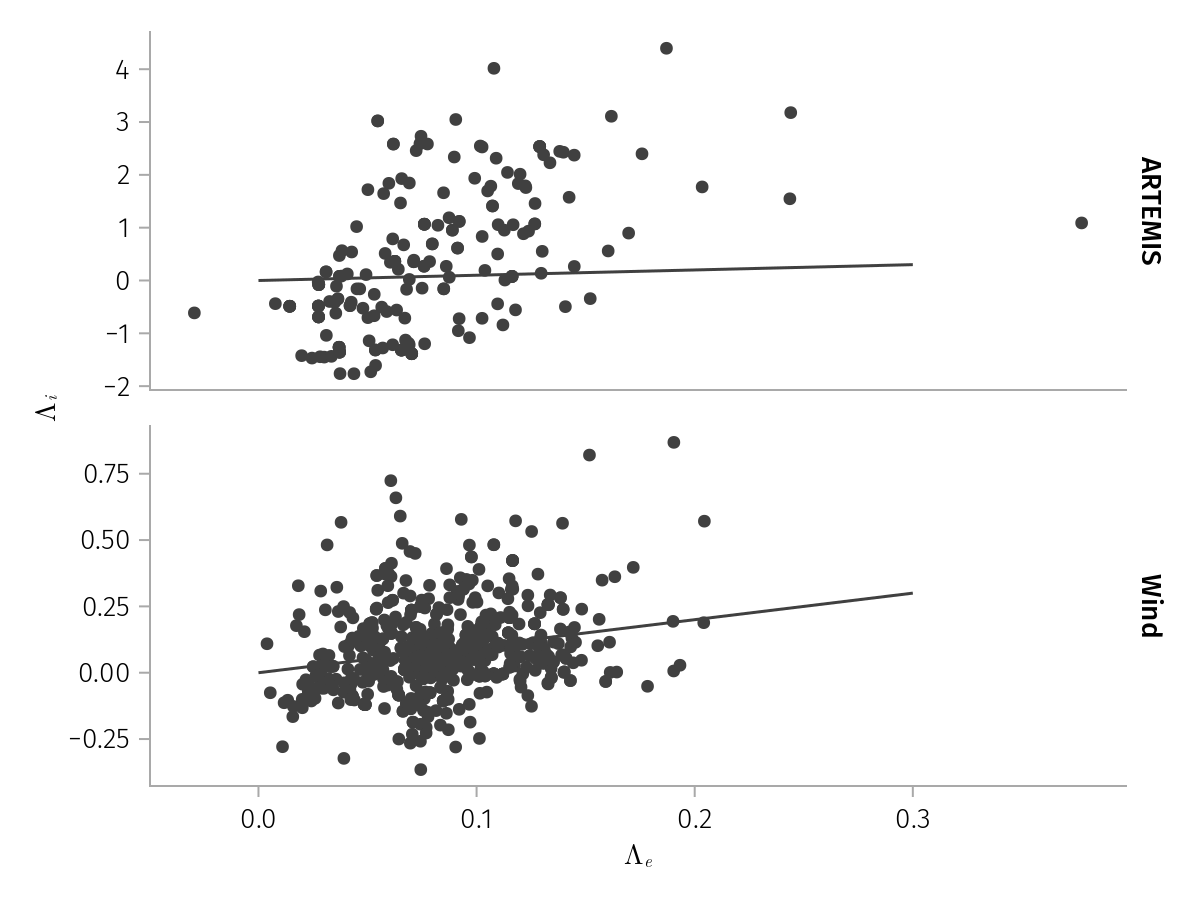

In [250]:
#| label: fig-anisotropy-comp-i-e
#| column: screen
plot_anistropy_comparison_i_e()